

# [ Heart Disease Prediction - Group 18]
### Group Members:
### Ceren Arkaç - 28269
### Pınar Gül - 28067
### Meral Yağmur Kavaz - 28115
### Taha Arshad - 30137

## Introduction

## In this project, the past records of patients having heart disease will be analyzed and visualized depending on the different attributes.

## Utilized Datasets

### Our Main Dataset

1.1 Data Dictionary ¶
1. age: age in years
2. sex: sex
    * 1 = male
    * 0 = female
3. cp: chest pain type
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)
    * 1 = true;
    * 0 = false
7. restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina
    * 1 = yes
    * 0 = no
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    * Value 0: upsloping
    * Value 1: flat
    * Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal:
    * 0 = error (in the original dataset 0 maps to NaN's)
    * 1 = fixed defect
    * 2 = normal
    * 3 = reversable defect
14. target (the lable):
    * 0 = no disease,
    * 1 = disease

In [240]:
from google.colab import drive
drive.mount('./drive', force_remount=True)

path_prefix = './drive/My Drive/CS210 Project-Group18'

Mounted at ./drive


In [241]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import seaborn as sns

%matplotlib inline

In [242]:
fname = "heart_disease.csv.txt"
df = pd.read_csv(join(path_prefix, fname))

In [243]:
df #a zero-based index column is generated since we didn't specify index values

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [244]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [245]:
df.tail()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes
303,38,1,nonanginal,138,175,0,0,173,0,0.0,1,NaN,normal,No


In [246]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [247]:
df.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD           object
dtype: object

In [248]:
print("shape: ","\n", df.shape,"\n")
print("coloumn names: ","\n", df.columns,"\n")
print("index values: ","\n", df.index,"\n")

shape:  
 (303, 14) 

coloumn names:  
 Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object') 

index values:  
 Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            294, 295, 296, 297, 298, 299, 300, 301, 302, 303],
           dtype='int64', length=303) 



In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


##Missing Value Treatment

In [250]:
df.isna()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False
302,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [251]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [252]:
df.loc[df.isnull().any(axis=1)]

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
88,53,0,nonanginal,128,216,0,2,115,0,0.0,1,0.0,NaN,No
167,52,1,nonanginal,138,223,0,0,169,0,0.0,1,NaN,normal,No
193,43,1,asymptomatic,132,247,1,2,143,1,0.1,2,NaN,reversable,Yes
267,52,1,asymptomatic,128,204,1,0,156,1,1.0,2,0.0,NaN,Yes
288,58,1,nontypical,125,220,0,0,144,0,0.4,2,NaN,reversable,No
303,38,1,nonanginal,138,175,0,0,173,0,0.0,1,NaN,normal,No


In [253]:
df.replace("NA", np.nan, inplace=True)

In [254]:
df["Ca"].fillna(df["Ca"].mean(), inplace = True)


In [255]:
df.loc[df.isnull().any(axis=1)]

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
88,53,0,nonanginal,128,216,0,2,115,0,0.0,1,0.0,NaN,No
267,52,1,asymptomatic,128,204,1,0,156,1,1.0,2,0.0,NaN,Yes


In [256]:
df = df.dropna(axis = 0)

In [257]:
df.loc[df.isnull().any(axis=1)]

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        301 non-null    int64  
 1   Sex        301 non-null    int64  
 2   ChestPain  301 non-null    object 
 3   RestBP     301 non-null    int64  
 4   Chol       301 non-null    int64  
 5   Fbs        301 non-null    int64  
 6   RestECG    301 non-null    int64  
 7   MaxHR      301 non-null    int64  
 8   ExAng      301 non-null    int64  
 9   Oldpeak    301 non-null    float64
 10  Slope      301 non-null    int64  
 11  Ca         301 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        301 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.3+ KB


In [259]:
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.000000,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.000000,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.000000,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.000000,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.000000,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.000000,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.000000,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.000000,reversable,Yes
302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.000000,normal,Yes


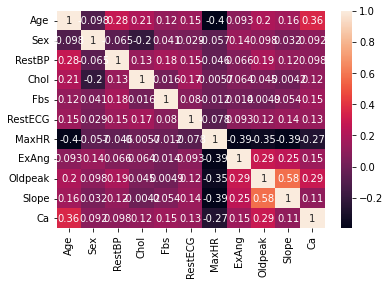

In [260]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Additional Datasets

In [261]:
fname2 = "healthcare-dataset-stroke-data.csv"
df_additional = pd.read_csv(join(path_prefix, fname2))


In [262]:
df.shape
df_additional.shape

(5110, 12)

In [263]:
df_additional.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [264]:
df_additional.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [265]:
df_additional.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [266]:
df_additional.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [267]:
print("shape: ","\n", df_additional.shape,"\n")
print("coloumn names: ","\n", df_additional.columns,"\n")
print("index values: ","\n", df_additional.index,"\n")

shape:  
 (5110, 12) 

coloumn names:  
 Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object') 

index values:  
 RangeIndex(start=0, stop=5110, step=1) 



In [268]:
df_additional.isna()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [269]:
df_additional.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [270]:
df_additional.loc[df_additional.isnull().any(axis=1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [271]:
df_additional.replace("NA", np.nan, inplace=True)

In [272]:
df_additional.loc[df_additional.isnull().any(axis=1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [273]:
df_additional = df_additional.dropna(axis = 0)

In [274]:
df_additional.loc[df_additional.isnull().any(axis=1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


# **Visualization of some attributes of additional dataset with relation to eachother.**

**Stroke and age**

In [275]:
Stroke_query=1
df_copy2 = df_additional
df_copy2 = df_copy2[df_copy2['stroke'] == Stroke_query]

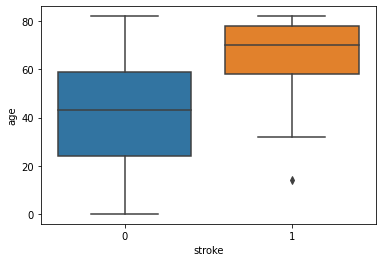

In [276]:
sns.boxplot(x='stroke', y='age', data = df_additional)

**Stroke and Avg_glucose_level**

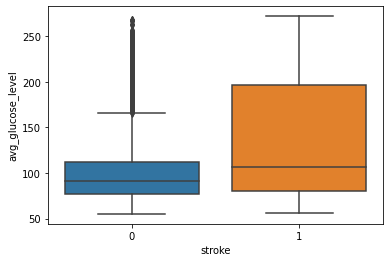

In [277]:
sns.boxplot(x='stroke', y='avg_glucose_level', data = df_additional)

**Stroke and hypertension**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



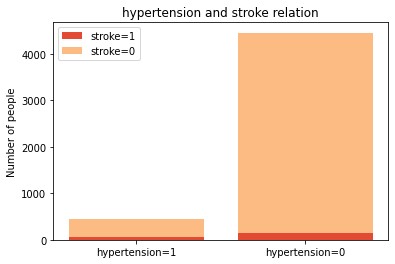

In [278]:
x = ['hypertension=1', 'hypertension=0']
y1 = [len(df_additional[df_additional['stroke'] == 1][df_additional['hypertension'] == 1]), len(df_additional[df_additional['stroke'] == 1][df_additional['hypertension'] == 0])]
y2 = [len(df_additional[df_additional['stroke'] == 0][df_additional['hypertension'] == 1]), len(df_additional[df_additional['stroke'] == 0][df_additional['hypertension'] == 0])]


plt.bar(x, y1, color="#e34a33")
plt.bar(x, y2, bottom=y1, color='#fdbb84')
plt.ylabel("Number of people")
plt.title("hypertension and stroke relation")
plt.legend(["stroke=1", "stroke=0",])
plt.show()

**Stroke and BMI**

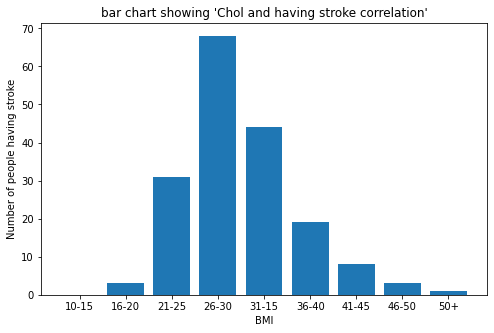

In [279]:
groups = ['10-15', '16-20', '21-25', '26-30', '31-15', '36-40', '41-45','46-50','50+' ]
numOfPple = [df_copy2[df_copy2['bmi'].between(10,15)].shape[0],df_copy2[df_copy2['bmi'].between(16,20)].shape[0],df_copy2[df_copy2['bmi'].between(21,25)].shape[0], df_copy2[df_copy2['bmi'].between(26,30)].shape[0], df_copy2[df_copy2['bmi'].between(31,35)].shape[0], df_copy2[df_copy2['bmi'].between(36, 40)].shape[0], df_copy2[df_copy2['bmi'].between(41,45)].shape[0], df_copy2[df_copy2['bmi'].between(46,50)].shape[0], df_copy2[df_copy2['bmi'] > 50].shape[0]]
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)

plt.bar(groups,numOfPple)
plt.xlabel("BMI")
plt.ylabel("Number of people having stroke")
plt.title("bar chart showing 'Chol and having stroke correlation'")

plt.show()

**hypertension and age**

In [280]:
HT_query=1
df_copy3 = df_additional
df_copy3 = df_copy2[df_copy2['hypertension'] == HT_query]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Text(0.5, 1.0, "bar chart showing 'age and having hypertension correlation'")

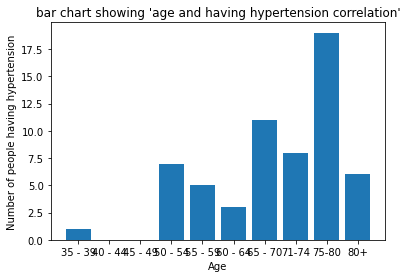

In [281]:
groups = ['35 - 39', '40 - 44', '45 - 49', '50 - 54', '55 - 59', '60 - 64', '65 - 70','71-74','75-80','80+']
numOfPple = [df_copy3[df_copy3['age'].between(35,39)].shape[0], df_copy3[df_copy3['age'].between(40,44)].shape[0], df_copy3[df_copy3['age'].between(45,49)].shape[0], df_copy3[df_copy3['age'].between(50,54)].shape[0], df_copy3[df_copy3['age'].between(55,59)].shape[0], df_copy3[df_copy2['age'].between(60,64)].shape[0], df_copy3[df_copy3['age'].between(65,70)].shape[0],df_copy3[df_copy3['age'].between(71,74)].shape[0],df_copy3[df_copy3['age'].between(75,80)].shape[0],df_copy3[df_copy3['age']>80].shape[0]]

plt.bar(groups,numOfPple)
plt.xlabel("Age")
plt.ylabel("Number of people having hypertension")
plt.title("bar chart showing 'age and having hypertension correlation'")

**Hypertension and Average Glucose Level**

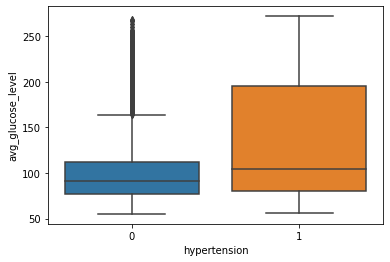

In [282]:
sns.boxplot(x='hypertension', y='avg_glucose_level', data = df_additional)

**Hypertension and BMI**

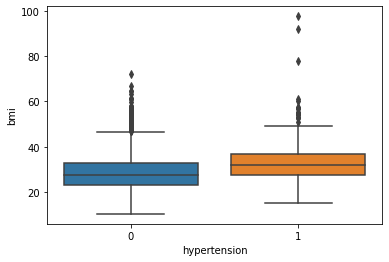

In [283]:
sns.boxplot(x='hypertension', y='bmi', data = df_additional)

**BMI correlation to Age and gender**

In [284]:
df_additional[["bmi", "age"]].corr()

,bmi,age
bmi,1.000000,0.333398
age,0.333398,1.000000


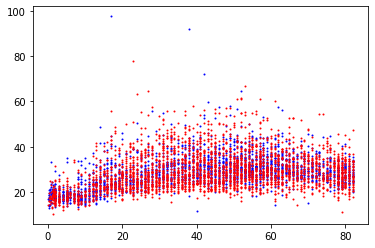

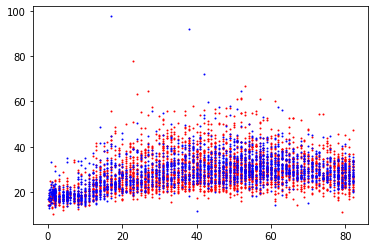

In [285]:
women = df_additional[df_additional['gender'] == 'Female'].dropna()
men = df_additional[df_additional['gender'] == 'Male'].dropna()
plt.scatter(men["age"], men["bmi"], s=1, c='b')
plt.scatter(women["age"], women["bmi"], s=1, c='r') 
plt.show()

plt.scatter(women["age"], women["bmi"], s=1, c='r')
plt.scatter(men["age"], men["bmi"], s=1, c='b')
plt.show() 

## Exploratory Data Analysis

##**Visualization of how each attribute correlate with AHD (0: no disease, 1: having disease)**






In [286]:
AHD_query = "Yes"
df_copy = df # create copy of the dataframe in order to keep same the main dataframe
df_copy = df_copy[df_copy['AHD'] == AHD_query] # create a new dataframe consists of having disease people

###Age and AHD

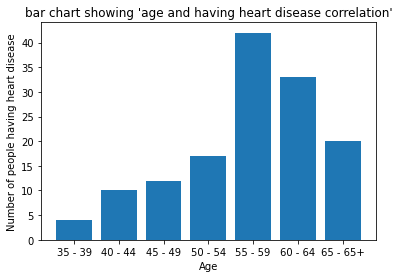

In [287]:
groups = ['35 - 39', '40 - 44', '45 - 49', '50 - 54', '55 - 59', '60 - 64', '65 - 65+'] # use age as a categorical data

# count the number of people for each age group and store them in a list
numOfPple = [df_copy[df_copy['Age'].between(35,39)].shape[0], df_copy[df_copy['Age'].between(40,44)].shape[0], df_copy[df_copy['Age'].between(45,49)].shape[0], df_copy[df_copy['Age'].between(50,54)].shape[0], df_copy[df_copy['Age'].between(55,59)].shape[0], df_copy[df_copy['Age'].between(60,64)].shape[0], df_copy[df_copy['Age'] > 64].shape[0]]

# create the bar chart regarding the list of age categories and the list of the number of people for each category 
# same indexes in the lists will match
plt.bar(groups,numOfPple)
plt.xlabel("Age")
plt.ylabel("Number of people having heart disease")
plt.title("bar chart showing 'age and having heart disease correlation'")

plt.show()

###Sex and AHD

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



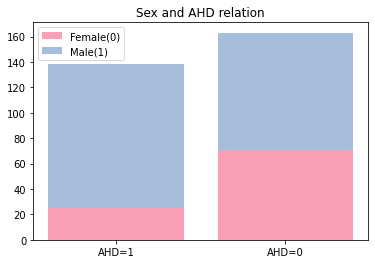

In [288]:
x=(["AHD=1", "AHD=0",]) # x line elements as a list
y2 = [len(df[df['AHD'] == 'Yes'][df['Sex'] == 1]), len(df[df['AHD'] == 'No'][df['Sex'] == 1])] # number of males for ahd=1 and ahd=0 respectively 
y1 = [len(df[df['AHD'] == 'Yes'][df['Sex'] == 0]), len(df[df['AHD'] == 'No'][df['Sex'] == 0])] # number of females for ahd=1 and ahd=0 respectively


plt.bar(x, y1, color="#fa9fb5") # first plot for females
plt.bar(x, y2, bottom=y1, color='#a6bddb') # then plot on top of the females
plt.title("Sex and AHD relation")
plt.legend(["Female(0)", "Male(1)"])
plt.show()

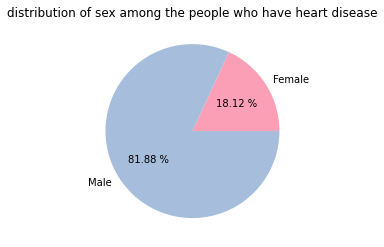

In [289]:
# distribution of sex among AHD=1 people

women = df_copy.loc[df_copy['Sex'] == 0].count()[0]  # count number of females 
men = df_copy.loc[df_copy['Sex'] == 1].count()[0]    # count number of males 
colors = ["#fa9fb5", '#a6bddb']
plt.pie([women,men], labels = ["Female", "Male"], autopct = "%.2f %%", colors = colors)
plt.title("distribution of sex among the people who have heart disease")
plt.show()

###ChestPain and AHD

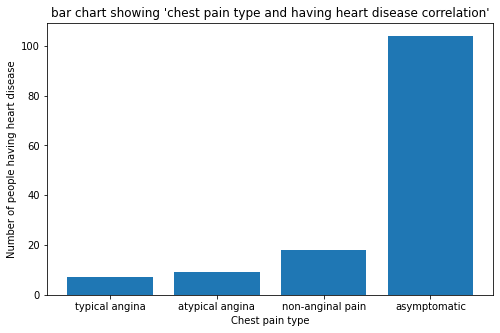

In [290]:
 # for x axis
groups = ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']

 # for y axis
numberOfPeople = [df_copy.loc[df_copy['ChestPain'] == 'typical'].count()[0], df_copy.loc[df_copy['ChestPain'] == 'nontypical'].count()[0], df_copy.loc[df_copy['ChestPain'] == 'nonanginal'].count()[0], df_copy.loc[df_copy['ChestPain'] == 'asymptomatic'].count()[0]]

# set the figure size
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)

plt.bar(groups, numberOfPeople)
plt.xlabel("Chest pain type")
plt.ylabel("Number of people having heart disease")
plt.title("bar chart showing 'chest pain type and having heart disease correlation'")

plt.show()

###RestBP and AHD

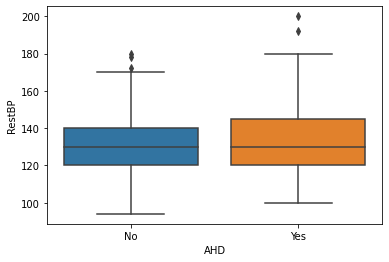

In [291]:
sns.boxplot(x='AHD', y='RestBP', data = df)


### Chol and AHD

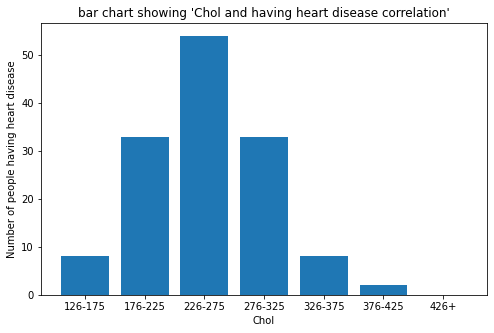

In [292]:
groups = ['126-175', '176-225', '226-275', '276-325', '326-375', '376-425', '426+' ]
numOfPple = [df_copy[df_copy['Chol'].between(126,175)].shape[0], df_copy[df_copy['Chol'].between(176,225)].shape[0], df_copy[df_copy['Chol'].between(226,275)].shape[0], df_copy[df_copy['Chol'].between(276, 325)].shape[0], df_copy[df_copy['Chol'].between(326,375)].shape[0], df_copy[df_copy['Chol'].between(376,425)].shape[0], df_copy[df_copy['Chol'] > 525].shape[0]]

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)

plt.bar(groups,numOfPple)
plt.xlabel("Chol")
plt.ylabel("Number of people having heart disease")
plt.title("bar chart showing 'Chol and having heart disease correlation'")

plt.show()

###Fbs and AHD

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



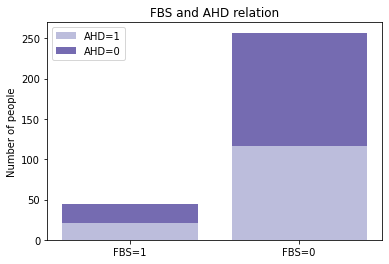

In [293]:
x = ['FBS=1', 'FBS=0']
y1 = [len(df[df['AHD'] == 'Yes'][df['Fbs'] == 1]), len(df[df['AHD'] == 'Yes'][df['Fbs'] == 0])]
y2 = [len(df[df['AHD'] == 'No'][df['Fbs'] == 1]), len(df[df['AHD'] == 'No'][df['Fbs'] == 0])]


plt.bar(x, y1, color="#bcbddc")
plt.bar(x, y2, bottom=y1, color='#756bb1')
plt.ylabel("Number of people")
plt.title("FBS and AHD relation")
plt.legend(["AHD=1", "AHD=0",])
plt.show()

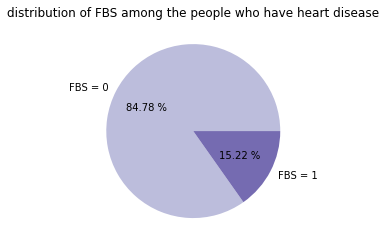

In [294]:
# distribution of FBS among AHD=1 people

fbs_0 = df_copy.loc[df_copy['Fbs'] == 0].count()[0]  # count number of fbs = 0 people
fbs_1 = df_copy.loc[df_copy['Fbs'] == 1].count()[0]
colors = ["#bcbddc", '#756bb1']
plt.pie([fbs_0, fbs_1], labels = ["FBS = 0", "FBS = 1"], autopct = "%.2f %%", colors = colors)
plt.title("distribution of FBS among the people who have heart disease")
plt.show()

###RestECG and AHD

[55 95] [3 1] [80 67]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



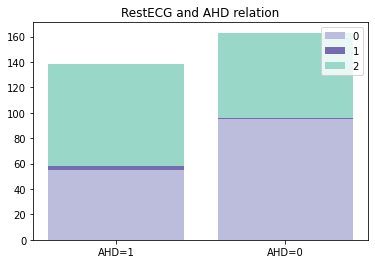

In [295]:
x=(["AHD=1", "AHD=0"])

y1 = np.array([len(df[df['AHD'] == 'Yes'][df['RestECG'] == 0]), len(df[df['AHD'] == 'No'][df['RestECG'] == 0])])
y2 = np.array([len(df[df['AHD'] == 'Yes'][df['RestECG'] == 1]), len(df[df['AHD'] == 'No'][df['RestECG'] == 1])])
y3 = np.array([len(df[df['AHD'] == 'Yes'][df['RestECG'] == 2]), len(df[df['AHD'] == 'No'][df['RestECG'] == 2])])

print(y1,y2,y3);


plt.bar(x, y1, color="#bcbddc")
plt.bar(x, y2, bottom=y1, color='#756bb1')
plt.bar(x, y3, bottom=y1+y2, color='#99d8c9')
plt.title("RestECG and AHD relation")
plt.legend(["0", "1","2"])
plt.show()

###MaxHR and AHD

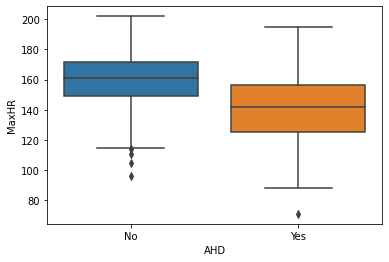

In [296]:
sns.boxplot(x='AHD', y='MaxHR', data = df)

###ExAng and AHD

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



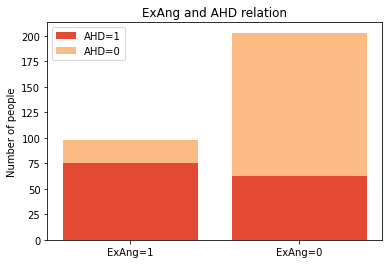

In [297]:
x = ['ExAng=1', 'ExAng=0']
y1 = [len(df[df['AHD'] == 'Yes'][df['ExAng'] == 1]), len(df[df['AHD'] == 'Yes'][df['ExAng'] == 0])]
y2 = [len(df[df['AHD'] == 'No'][df['ExAng'] == 1]), len(df[df['AHD'] == 'No'][df['ExAng'] == 0])]


plt.bar(x, y1, color="#e34a33")
plt.bar(x, y2, bottom=y1, color='#fdbb84')
plt.ylabel("Number of people")
plt.title("ExAng and AHD relation")
plt.legend(["AHD=1", "AHD=0",])
plt.show()

###Oldpeak and AHD

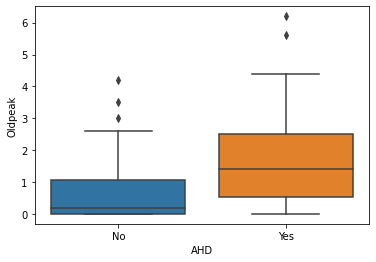

In [298]:
sns.boxplot(x='AHD', y='Oldpeak', data = df)

###Slope and AHD

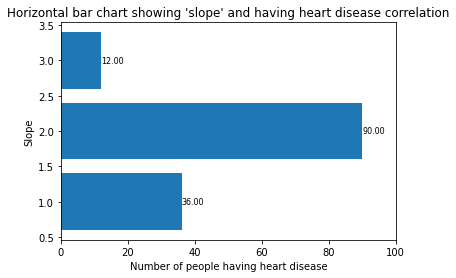

In [299]:
y_axis = [1,2,3]
x_axis = [df_copy.loc[df_copy['Slope'] == 1].count()[0], df_copy.loc[df_copy['Slope'] == 2].count()[0], df_copy.loc[df_copy['Slope'] == 3].count()[0] ]
plt.barh(y_axis,x_axis)


for value, cat in zip(x_axis, y_axis):
  plt.text(value, cat, f"{value:.2f}", verticalalignment="center", fontsize=8)
plt.xlim([0, 100])
plt.title("Horizontal bar chart showing 'slope' and having heart disease correlation")
plt.ylabel('Slope')
plt.xlabel("Number of people having heart disease")
plt.show()

###Ca and AHD

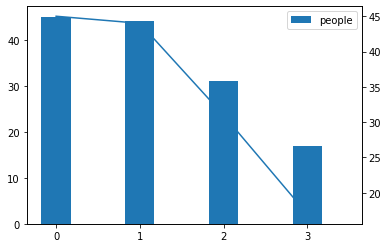

In [300]:
width = .35 # width of a bar

m1_t = pd.DataFrame({
 'people' : [df_copy.loc[df_copy['Ca'] == 0].count()[0], df_copy.loc[df_copy['Ca'] == 1].count()[0], df_copy.loc[df_copy['Ca'] == 2].count()[0], df_copy.loc[df_copy['Ca'] == 3].count()[0] ]})

m1_t[['people']].plot(kind='bar', width = width)
m1_t['people'].plot(secondary_y=True)

ax = plt.gca()
plt.xlim([-width, len(m1_t['people'])-width])
ax.set_xticklabels((0,1,2,3))

plt.show()

###Thal and AHD

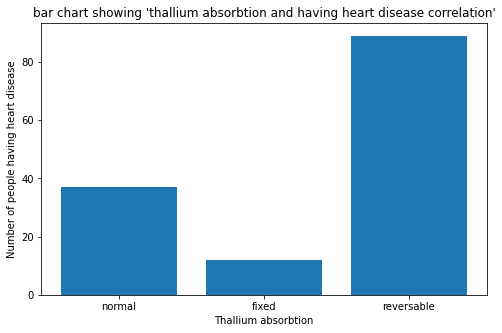

In [301]:
df.head()
# for x axis
groups = ['normal', 'fixed', 'reversable']

 # for y axis
numberOfPeople = [df_copy.loc[df_copy['Thal'] == 'normal'].count()[0], df_copy.loc[df_copy['Thal'] == 'fixed'].count()[0], df_copy.loc[df_copy['Thal'] == 'reversable'].count()[0]]

# set the figure size
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)

plt.bar(groups, numberOfPeople)
plt.xlabel("Thallium absorbtion")
plt.ylabel("Number of people having heart disease")
plt.title("bar chart showing 'thallium absorbtion and having heart disease correlation'")

plt.show()

##**Visualization of the relationship between some selected attributes and AHD (0: no disease, 1: having disease)**

### [age, sex, Chol] and AHD

### In the first graph, blue is for both male and female who are AHD=0, orange for both male and female who are AHD=1. For the second graph it is the opposite. Normal triangles are representing male, upside down triangles representing female.
### The main reason to have two grahp is that, in scatter plot graphs the second implemented information can block the first if they are equal. So implement blue - orange than orange - blue so not to lose any information because of block.

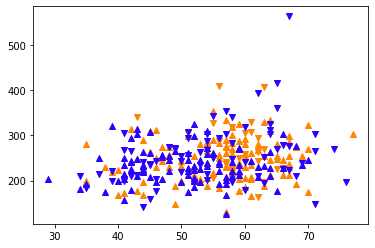

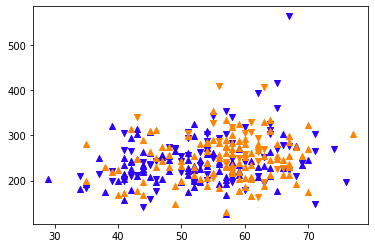

In [302]:
AHD_query = "Yes"
df__copy = df.copy()
cond = df__copy['AHD'] == AHD_query
ahd_yes_people = df__copy[cond].dropna()
ahd_no_people = df__copy[~cond].dropna()

ahd_yes_male = ahd_yes_people[ahd_yes_people['Sex'] == 1].dropna()
ahd_yes_female = ahd_yes_people[ahd_yes_people['Sex'] == 0].dropna()
ahd_no_male = ahd_no_people[ahd_no_people['Sex'] == 1].dropna()
ahd_no_female = ahd_no_people[ahd_no_people['Sex'] == 0].dropna()

plt.scatter(ahd_yes_male["Age"], ahd_yes_male["Chol"], color = '#ff8400' , marker = "^") # orange
plt.scatter(ahd_yes_female["Age"], ahd_yes_female["Chol"], color = '#ff8400', marker = "v")
plt.scatter(ahd_no_male["Age"], ahd_no_male["Chol"], color = '#2b00ff', marker = "^")  # blue
plt.scatter(ahd_no_female["Age"], ahd_no_female["Chol"], color = '#2b00ff', marker = "v") 
plt.show()


plt.scatter(ahd_no_male["Age"], ahd_no_male["Chol"], color = '#2b00ff', marker = "^")  # blue
plt.scatter(ahd_no_female["Age"], ahd_no_female["Chol"], color = '#2b00ff', marker = "v") 
plt.scatter(ahd_yes_male["Age"], ahd_yes_male["Chol"], color = '#ff8400' , marker = "^") # orange
plt.scatter(ahd_yes_female["Age"], ahd_yes_female["Chol"], color = '#ff8400', marker = "v")
plt.show()



### [Chol, MaxHR] and AHD

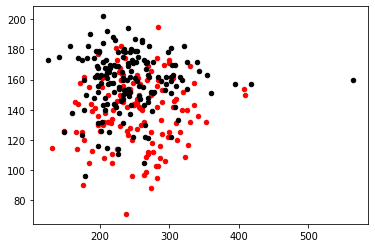

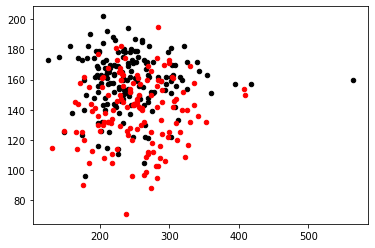

In [303]:
plt.scatter(ahd_yes_people["Chol"], ahd_yes_people["MaxHR"], s=20, c='#ff0000', label='AHD = 1') #black
plt.scatter(ahd_no_people["Chol"], ahd_no_people["MaxHR"], s=20, c='#000000', label='AHD = 0')  #red
plt.show()

plt.scatter(ahd_no_people["Chol"], ahd_no_people["MaxHR"], s=20, c='#000000', label='AHD = 0')  #red
plt.scatter(ahd_yes_people["Chol"], ahd_yes_people["MaxHR"], s=20, c='#ff0000', label='AHD = 1') #black
plt.show()

### [Oldpeak, ChestPain, Fbs] and AHD

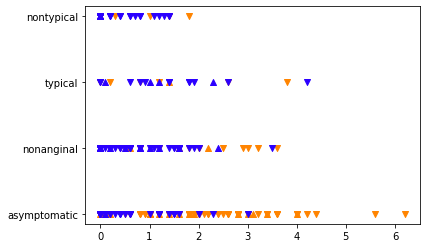

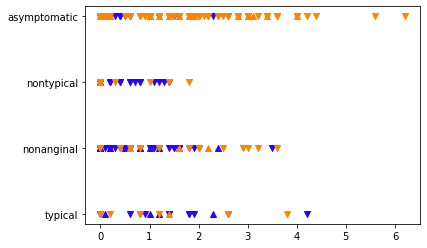

In [304]:
ahd_yes_fbs_1 = ahd_yes_people[ahd_yes_people['Fbs'] == 1].dropna()
ahd_yes_fbs_0 = ahd_yes_people[ahd_yes_people['Fbs'] == 0].dropna()
ahd_no_fbs_1 = ahd_no_people[ahd_no_people['Fbs'] == 1].dropna()
ahd_no_fbs_0 = ahd_no_people[ahd_no_people['Fbs'] == 0].dropna()

# hastalar turuncu, turuncularin fbs 0 genelde.
plt.scatter(ahd_yes_fbs_1["Oldpeak"], ahd_yes_fbs_1["ChestPain"], color = '#ff8400' , marker = "^") # orange
plt.scatter(ahd_yes_fbs_0["Oldpeak"], ahd_yes_fbs_0["ChestPain"], color = '#ff8400', marker = "v")
plt.scatter(ahd_no_fbs_1["Oldpeak"], ahd_no_fbs_1["ChestPain"], color = '#2b00ff', marker = "^")  # blue
plt.scatter(ahd_no_fbs_0["Oldpeak"], ahd_no_fbs_0["ChestPain"], color = '#2b00ff', marker = "v") 
plt.show()

plt.scatter(ahd_no_fbs_1["Oldpeak"], ahd_no_fbs_1["ChestPain"], color = '#2b00ff', marker = "^")  # blue
plt.scatter(ahd_no_fbs_0["Oldpeak"], ahd_no_fbs_0["ChestPain"], color = '#2b00ff', marker = "v") 
plt.scatter(ahd_yes_fbs_1["Oldpeak"], ahd_yes_fbs_1["ChestPain"], color = '#ff8400' , marker = "^") # orange
plt.scatter(ahd_yes_fbs_0["Oldpeak"], ahd_yes_fbs_0["ChestPain"], color = '#ff8400', marker = "v")
plt.show()


###**Analyze Chol, Fbs and ExAng values with respect to age and sex**

In [305]:
df[["Chol", "Age"]].corr()

,Chol,Age
Chol,1.000000,0.208287
Age,0.208287,1.000000


In [306]:
df[["Chol", "Sex"]].corr()

,Chol,Sex
Chol,1.000000,-0.202126
Sex,-0.202126,1.000000


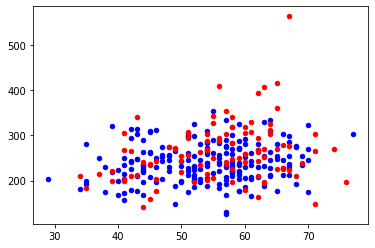

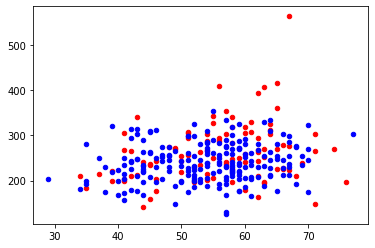

In [307]:
women = df[df['Sex'] == 0].dropna()
men = df[df['Sex'] == 1].dropna()
plt.scatter(men["Age"], men["Chol"], s=20, c='b')
plt.scatter(women["Age"], women["Chol"], s=20, c='r') 
plt.show()

plt.scatter(women["Age"], women["Chol"], s=20, c='r')
plt.scatter(men["Age"], men["Chol"], s=20, c='b')
plt.show() 

In [308]:
df_c = df.copy()
df_c = df_c.drop(["ChestPain", "RestBP","RestECG", "MaxHR", "Oldpeak", "Slope", "Ca", "Thal", "AHD"], axis=1)
corrs = df_c.corr()

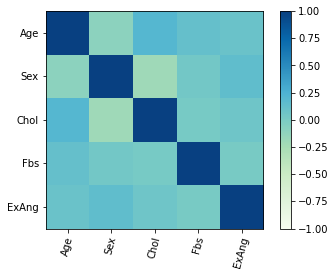

In [309]:
plt.imshow(corrs, cmap="GnBu", vmin = -1, vmax = 1)
plt.colorbar()
plt.xticks(range(len(corrs)),corrs.columns, rotation=75)
plt.yticks(range(len(corrs)),corrs.index)
plt.show()

###**Analyze & visualize how each attribute changes with respect to age and sex**

### ChestPain and [Age,Sex]

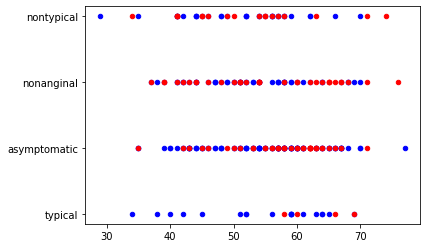

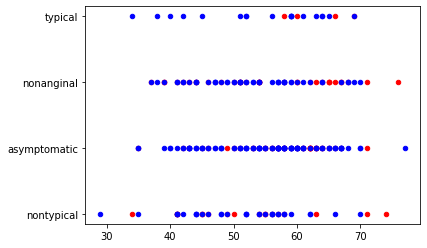

In [310]:
women = df[df['Sex'] == 0].dropna()
men = df[df['Sex'] == 1].dropna()
plt.scatter(men["Age"], men["ChestPain"], s=20, c='b')
plt.scatter(women["Age"], women["ChestPain"], s=20, c='r') 
plt.show()

plt.scatter(women["Age"], women["ChestPain"], s=20, c='r')
plt.scatter(men["Age"], men["ChestPain"], s=20, c='b')
plt.show() 

###RestBP and [Age,Sex]

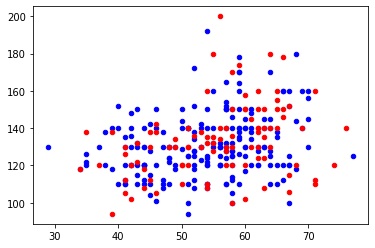

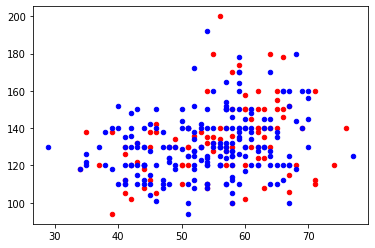

In [311]:
women = df[df['Sex'] == 0].dropna()
men = df[df['Sex'] == 1].dropna()
plt.scatter(men["Age"], men["RestBP"], s=20, c='b')
plt.scatter(women["Age"], women["RestBP"], s=20, c='r') 
plt.show()

plt.scatter(women["Age"], women["RestBP"], s=20, c='r')
plt.scatter(men["Age"], men["RestBP"], s=20, c='b')
plt.show() 

### Fbs and [Age,Sex]

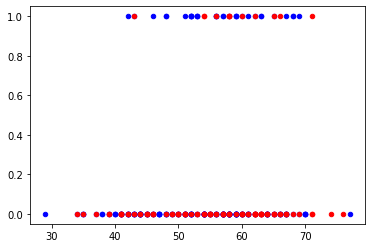

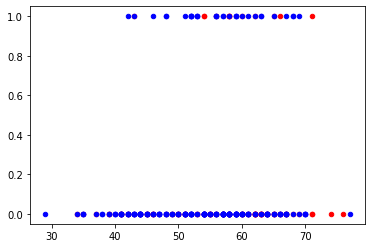

In [312]:
women = df[df['Sex'] == 0].dropna()
men = df[df['Sex'] == 1].dropna()
plt.scatter(men["Age"], men["Fbs"], s=20, c='b')
plt.scatter(women["Age"], women["Fbs"], s=20, c='r') 
plt.show()

plt.scatter(women["Age"], women["Fbs"], s=20, c='r')
plt.scatter(men["Age"], men["Fbs"], s=20, c='b')
plt.show() 

### *another type of plotting rathen than scatter plot*

In [313]:
def categorize(age):

  if 36 <= age < 40:
      return '35 - 39'
  elif 40 <= age < 45:
      return '40 - 44'
  elif 45 <= age < 50:
      return '45 - 49'
  elif 50 <= age < 55:
      return '50 - 54'
  elif 55 <= age < 60:
      return '55 - 59'
  elif 60 <= age < 65:
      return '60 - 64'
  else:
      return '65 - 65+'

In [314]:
df['Categorical Age'] = df['Age'].apply(categorize)   # add a new attribute called 'Categorical Age' based on Age and function 'categorize'
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Categorical Age
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,60 - 64
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,65 - 65+
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,65 - 65+
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,35 - 39
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,40 - 44


In [315]:
age35_39 = df[df["Categorical Age"] == '35 - 39']
age40_44 = df[df["Categorical Age"] == '40 - 44']
age45_49 = df[df["Categorical Age"] == '45 - 49']
age50_54 = df[df["Categorical Age"] == '50 - 54']
age55_59 = df[df["Categorical Age"] == '55 - 59']
age60_64 = df[df["Categorical Age"] == '60 - 64']
age65_65 = df[df["Categorical Age"] == '65 - 65+']

groups = ['35 - 39', '40 - 44', '45 - 49', '50 - 54', '55 - 59', '60 - 64', '65 - 65+']

men = [age35_39[age35_39["Sex"] == 0].count()[0], age40_44[age40_44["Sex"] == 0].count()[0], age45_49[age45_49["Sex"] == 0].count()[0],\
       age50_54[age50_54["Sex"] == 0].count()[0], age55_59[age55_59["Sex"] == 0].count()[0], age60_64[age60_64["Sex"] == 0].count()[0],\
       age65_65[age65_65["Sex"] == 0].count()[0]]  # count the number of men in each caterogical age and store the values in a list

women = [age35_39[age35_39["Sex"] == 1].count()[0], age40_44[age40_44["Sex"] == 1].count()[0], age45_49[age45_49["Sex"] == 1].count()[0],\
         age50_54[age50_54["Sex"] == 1].count()[0], age55_59[age55_59["Sex"] == 1].count()[0], age60_64[age60_64["Sex"] == 1].count()[0],\
         age65_65[age65_65["Sex"] == 1].count()[0]]  # count the number of women in each caterogical age and store the values in a list

### MaxHR and [Age,Sex]

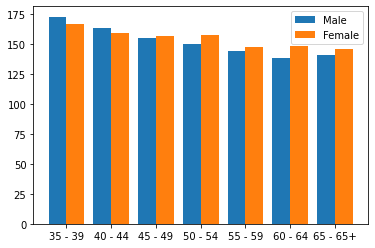

In [316]:
# age35_39.groupby("Sex")["MaxHR"].mean() ------> for each categorical age, take the mean of MaxHR values
# age35_39.groupby("Sex")["MaxHR"].mean()[0] ---> 0th index is for men, 1st index is for women

women_MaxHR_means_wrt_ages = [age35_39.groupby("Sex")["MaxHR"].mean()[0], age40_44.groupby("Sex")["MaxHR"].mean()[0],\
                              age45_49.groupby("Sex")["MaxHR"].mean()[0], age50_54.groupby("Sex")["MaxHR"].mean()[0],\
                              age55_59.groupby("Sex")["MaxHR"].mean()[0], age60_64.groupby("Sex")["MaxHR"].mean()[0],\
                              age65_65.groupby("Sex")["MaxHR"].mean()[0]]   

men_MaxHR_means_wrt_ages = [age35_39.groupby("Sex")["MaxHR"].mean()[1], age40_44.groupby("Sex")["MaxHR"].mean()[1],\
                            age45_49.groupby("Sex")["MaxHR"].mean()[1], age50_54.groupby("Sex")["MaxHR"].mean()[1],\
                            age55_59.groupby("Sex")["MaxHR"].mean()[1], age60_64.groupby("Sex")["MaxHR"].mean()[1],\
                            age65_65.groupby("Sex")["MaxHR"].mean()[1]]

# Multiple bar Chart
x_axis = np.arange(len(groups))

plt.bar(x_axis -0.2, men_MaxHR_means_wrt_ages, width=0.4, label = 'Male')
plt.bar(x_axis +0.2, women_MaxHR_means_wrt_ages, width=0.4, label = 'Female')

plt.xticks(x_axis, groups)
plt.legend()
plt.show()

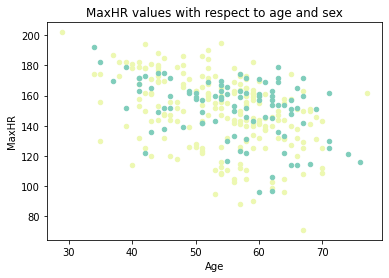

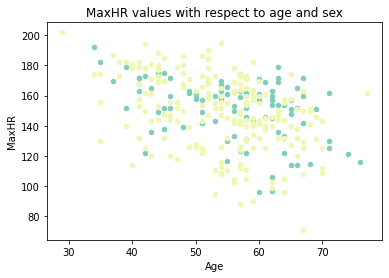

In [317]:
women = df[df['Sex'] == 0].dropna()
men = df[df['Sex'] == 1].dropna()
plt.scatter(men["Age"], men["MaxHR"], s=20, c='#edf8b1')
plt.scatter(women["Age"], women["MaxHR"], s=20, c='#7fcdbb') 
plt.xlabel("Age")
plt.ylabel("MaxHR")
plt.title("MaxHR values with respect to age and sex") 
plt.show()

plt.scatter(women["Age"], women["MaxHR"], s=20, c='#7fcdbb')
plt.scatter(men["Age"], men["MaxHR"], s=20, c='#edf8b1')
plt.xlabel("Age")
plt.ylabel("MaxHR")
plt.title("MaxHR values with respect to age and sex") 
plt.show()

### RestECG and [Age,Sex]

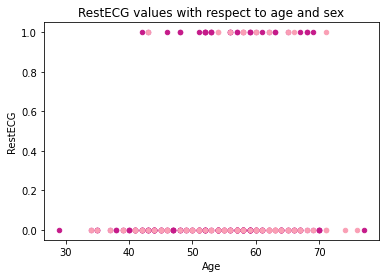

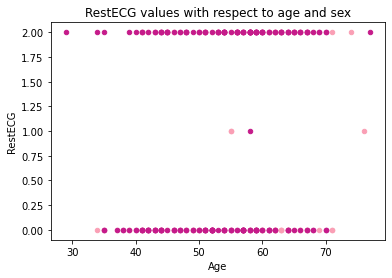

In [318]:
women = df[df['Sex'] == 0].dropna()
men = df[df['Sex'] == 1].dropna()
plt.scatter(men["Age"], men["Fbs"], s=20, c='#c51b8a')
plt.scatter(women["Age"], women["Fbs"], s=20, c='#fa9fb5')

plt.xlabel("Age")
plt.ylabel("RestECG")
plt.title("RestECG values with respect to age and sex") 
plt.show()

plt.scatter(women["Age"], women["RestECG"], s=20, c='#fa9fb5')
plt.scatter(men["Age"], men["RestECG"], s=20, c='#c51b8a')
plt.xlabel("Age")
plt.ylabel("RestECG")
plt.title("RestECG values with respect to age and sex") 
plt.show()

### ExAng and [Age,Sex]

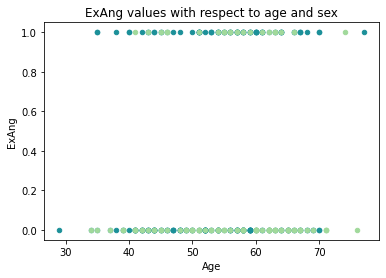

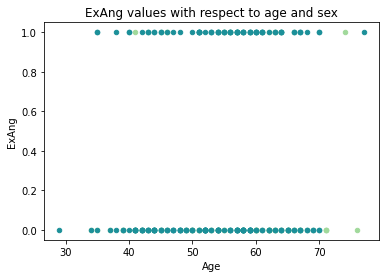

In [319]:
women = df[df['Sex'] == 0].dropna()
men = df[df['Sex'] == 1].dropna()
plt.scatter(men["Age"], men["ExAng"], s=20, c='#1c9099')
plt.scatter(women["Age"], women["ExAng"], s=20, c='#a1d99b') 
plt.xlabel("Age")
plt.ylabel("ExAng")
plt.title("ExAng values with respect to age and sex") 
plt.show()

plt.scatter(women["Age"], women["ExAng"], s=20, c='#a1d99b')
plt.scatter(men["Age"], men["ExAng"], s=20, c='#1c9099')
plt.xlabel("Age")
plt.ylabel("ExAng")
plt.title("ExAng values with respect to age and sex") 
plt.show()

### Oldpeak and [Age,Sex]

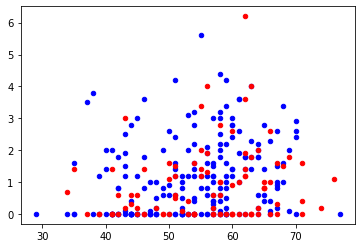

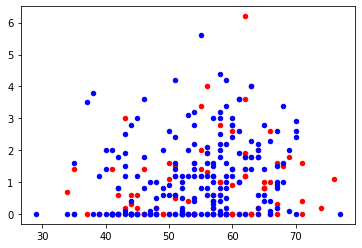

In [320]:
women = df[df['Sex'] == 0].dropna()
men = df[df['Sex'] == 1].dropna()
plt.scatter(men["Age"], men["Oldpeak"], s=20, c='b')
plt.scatter(women["Age"], women["Oldpeak"], s=20, c='r') 
plt.show()

plt.scatter(women["Age"], women["Oldpeak"], s=20, c='r')
plt.scatter(men["Age"], men["Oldpeak"], s=20, c='b')
plt.show()

### Slope and [Age,Sex]

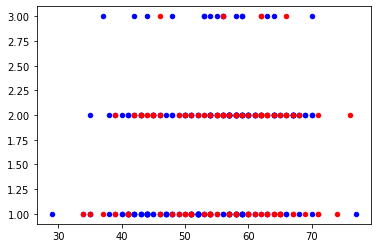

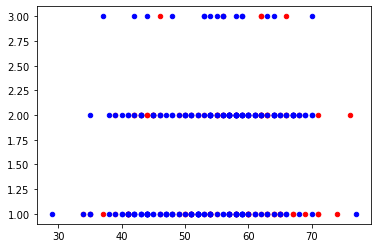

In [321]:
women = df[df['Sex'] == 0].dropna()
men = df[df['Sex'] == 1].dropna()
plt.scatter(men["Age"], men["Slope"], s=20, c='b')
plt.scatter(women["Age"], women["Slope"], s=20, c='r') 
plt.show()

plt.scatter(women["Age"], women["Slope"], s=20, c='r')
plt.scatter(men["Age"], men["Slope"], s=20, c='b')
plt.show()

### Ca and [Age,Sex]

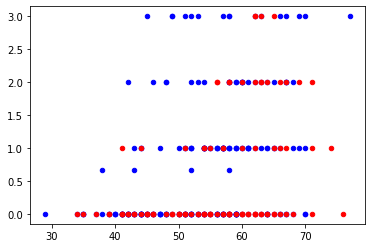

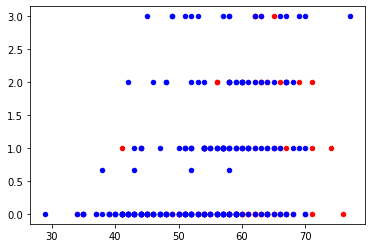

In [322]:
women = df[df['Sex'] == 0].dropna()
men = df[df['Sex'] == 1].dropna()
plt.scatter(men["Age"], men["Ca"], s=20, c='b')
plt.scatter(women["Age"], women["Ca"], s=20, c='r') 
plt.show()

plt.scatter(women["Age"], women["Ca"], s=20, c='r')
plt.scatter(men["Age"], men["Ca"], s=20, c='b')
plt.show()

### Thal and [Age,Sex]

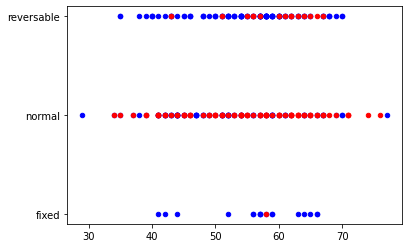

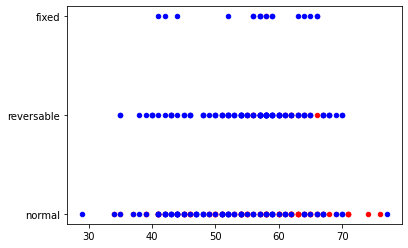

In [323]:
women = df[df['Sex'] == 0].dropna()
men = df[df['Sex'] == 1].dropna()
plt.scatter(men["Age"], men["Thal"], s=20, c='b')
plt.scatter(women["Age"], women["Thal"], s=20, c='r') 
plt.show()

plt.scatter(women["Age"], women["Thal"], s=20, c='r')
plt.scatter(men["Age"], men["Thal"], s=20, c='b')
plt.show()

### AHD and [Age,Sex]

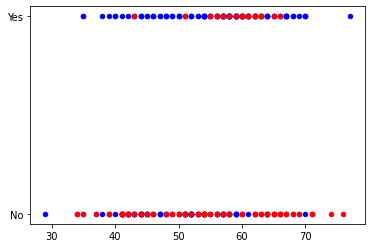

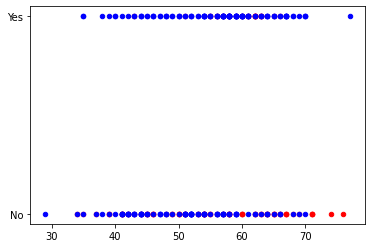

In [324]:
women = df[df['Sex'] == 0].dropna()
men = df[df['Sex'] == 1].dropna()
plt.scatter(men["Age"], men["AHD"], s=20, c='b')
plt.scatter(women["Age"], women["AHD"], s=20, c='r') 
plt.show()

plt.scatter(women["Age"], women["AHD"], s=20, c='r')
plt.scatter(men["Age"], men["AHD"], s=20, c='b')
plt.show()

#**Analyze & visualize the relationship between each attribute (without AHD) and chest pain**

###ChestPain and MaxHR
Below plot show the relationship bewteen chestpain and AHD by looking the mean MaxHR values for each chestPain type.

In [325]:
groups2 = ['typical', 'nontypical', 'nonanginal', 'asymptomatic']

<function matplotlib.pyplot.show>

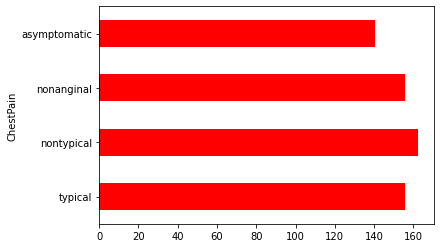

In [326]:

ax = df.groupby(by = "ChestPain").mean()["MaxHR"][groups2].plot(kind = "barh", color = "red")
plt.show

RestBP and Chestpain

<function matplotlib.pyplot.show>

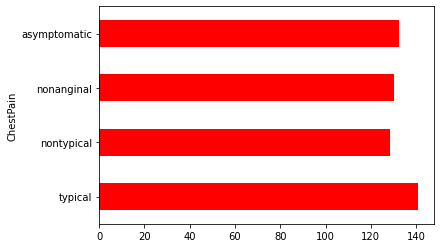

In [327]:

ax = df.groupby(by = "ChestPain").mean()["RestBP"][groups2].plot(kind = "barh", color = "red")
plt.show

Chol and ChestPain

<function matplotlib.pyplot.show>

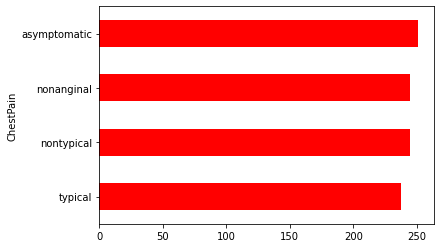

In [328]:

ax = df.groupby(by = "ChestPain").mean()["Chol"][groups2].plot(kind = "barh", color = "red")
plt.show

RestECG and ChestPain

<function matplotlib.pyplot.show>

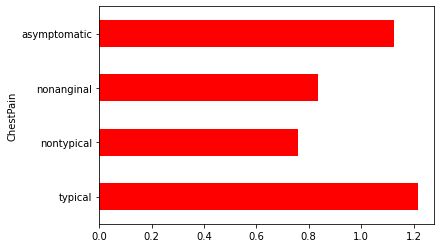

In [329]:
ax = df.groupby(by = "ChestPain").mean()["RestECG"][groups2].plot(kind = "barh", color = "red")
plt.show

OldPeak and Chestpain

<function matplotlib.pyplot.show>

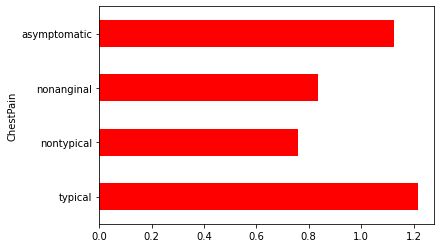

In [330]:
ax = df.groupby(by = "ChestPain").mean()["RestECG"][groups2].plot(kind = "barh", color = "red")
plt.show

Ca and Chestpain

<function matplotlib.pyplot.show>

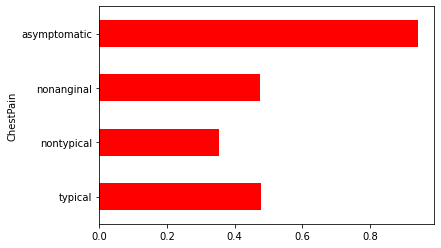

In [331]:
ax = df.groupby(by = "ChestPain").mean()["Ca"][groups2].plot(kind = "barh", color = "red")
plt.show

Slope and Chestpain

<function matplotlib.pyplot.show>

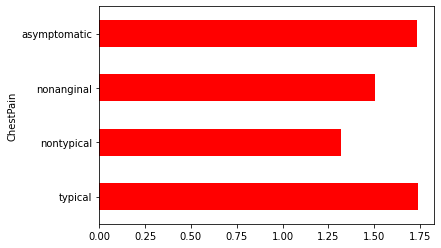

In [332]:
ax = df.groupby(by = "ChestPain").mean()["Slope"][groups2].plot(kind = "barh", color = "red")
plt.show

ExAng and Chestpain

<function matplotlib.pyplot.show>

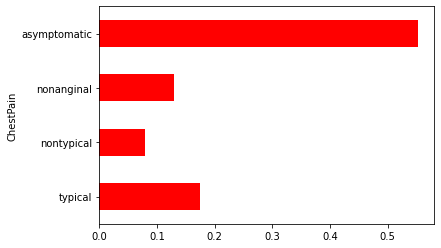

In [333]:
ax = df.groupby(by = "ChestPain").mean()["ExAng"][groups2].plot(kind = "barh", color = "red")
plt.show

##**Analyze & visualize the relationship between two selected attributes, as well as whether they would lead to disease or not**

###[ChestPain, Chol] and AHD

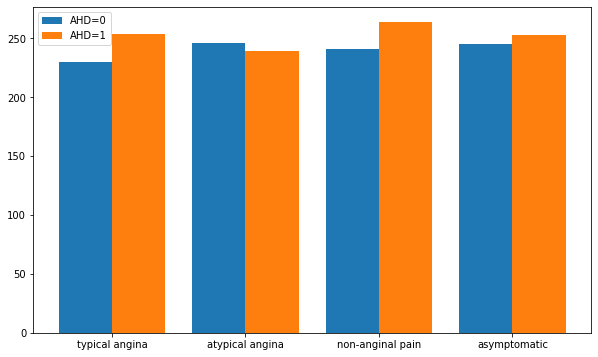

In [334]:
pain_ty = df[df["ChestPain"] == 'typical']
pain_no_an = df[df["ChestPain"] == 'nonanginal'] 
pain_no_ty = df[df["ChestPain"] == 'nontypical']
pain_as = df[df["ChestPain"] == 'asymptomatic']


groups = ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']

negative = [pain_ty[pain_ty["AHD"] == 'No'].count()[0], pain_no_an[pain_no_an["AHD"] == 'No'].count()[0], pain_no_ty[pain_no_ty["AHD"] == 'No'].count()[0],\
       pain_as[pain_as["AHD"] == 'No'].count()[0]]  # count the number of AHD = 0 in each caterogical age and store the values in a list

positive = [pain_ty[pain_ty["AHD"] == 'Yes'].count()[0], pain_no_an[pain_no_an["AHD"] == 'Yes'].count()[0], pain_no_ty[pain_no_ty["AHD"] == 'Yes'].count()[0],\
       pain_as[pain_as["AHD"] == 'Yes'].count()[0]]  # count the number of AHD = 1 in each caterogical age and store the values in a list

negative_Chol_means_wrt_ChestP = [pain_ty.groupby("AHD")["Chol"].mean()[0], pain_no_an.groupby("AHD")["Chol"].mean()[0],\
                              pain_no_ty.groupby("AHD")["Chol"].mean()[0], pain_as.groupby("AHD")["Chol"].mean()[0]]   

positive_Chol_means_wrt_ChestP = [pain_ty.groupby("AHD")["Chol"].mean()[1], pain_no_an.groupby("AHD")["Chol"].mean()[1],\
                            pain_no_ty.groupby("AHD")["Chol"].mean()[1], pain_as.groupby("AHD")["Chol"].mean()[1]]

# Multiple bar Chart
x_axis = np.arange(len(groups))

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

plt.bar(x_axis -0.2, negative_Chol_means_wrt_ChestP, width=0.4, label = 'AHD=0')
plt.bar(x_axis +0.2, positive_Chol_means_wrt_ChestP, width=0.4, label = 'AHD=1')

plt.xticks(x_axis, groups)
plt.legend()
plt.show()

###[MaxHR, Thal] and AHD

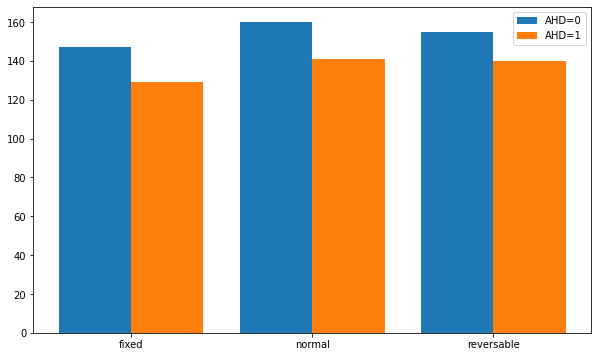

In [335]:
fix = df[df["Thal"] == 'fixed']
norm = df[df["Thal"] == 'normal']  
rev = df[df["Thal"] == 'reversable']

groups = ['fixed', 'normal', 'reversable']

negative = [fix[fix["AHD"] == 'No'].count()[0], norm[norm["AHD"] == 'No'].count()[0], rev[rev["AHD"] == 'No'].count()[0]]  

positive = [fix[fix["AHD"] == 'Yes'].count()[0], norm[norm["AHD"] == 'Yes'].count()[0], rev[rev["AHD"] == 'Yes'].count()[0]]  

negative_Maxhr_means_wrt_Thal = [fix.groupby("AHD")["MaxHR"].mean()[0], norm.groupby("AHD")["MaxHR"].mean()[0], rev.groupby("AHD")["MaxHR"].mean()[0]]   

positive_Maxhr_means_wrt_Thal = [fix.groupby("AHD")["MaxHR"].mean()[1], norm.groupby("AHD")["MaxHR"].mean()[1], rev.groupby("AHD")["MaxHR"].mean()[1]]

# Multiple bar Chart
x_axis = np.arange(len(groups))

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

plt.bar(x_axis -0.2, negative_Maxhr_means_wrt_Thal, width=0.4, label = 'AHD=0')
plt.bar(x_axis +0.2, positive_Maxhr_means_wrt_Thal, width=0.4, label = 'AHD=1')

plt.xticks(x_axis, groups)
plt.legend()
plt.show()

###[RestBP, Age] and AHD

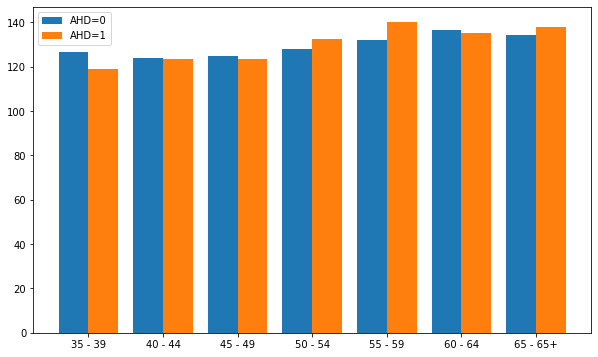

In [336]:
groups = ['35 - 39', '40 - 44', '45 - 49', '50 - 54', '55 - 59', '60 - 64', '65 - 65+']

negative = [age35_39[age35_39["AHD"] == 'No'].count()[0], age40_44[age40_44["AHD"] == 'No'].count()[0], age45_49[age45_49["AHD"] == 'No'].count()[0],\
                   age50_54[age50_54["AHD"] == 'No'].count()[0], age55_59[age55_59["AHD"] == 'No'].count()[0], age60_64[age60_64["AHD"] == 'No'].count()[0],\
                  age65_65[age65_65["AHD"] == 'No'].count()[0]]   

positive = [age35_39[age35_39["AHD"] == 'Yes'].count()[0], age40_44[age40_44["AHD"] == 'Yes'].count()[0], age45_49[age45_49["AHD"] == 'Yes'].count()[0],\
                   age50_54[age50_54["AHD"] == 'Yes'].count()[0], age55_59[age55_59["AHD"] == 'Yes'].count()[0], age60_64[age60_64["AHD"] == 'Yes'].count()[0],\
                 age65_65[age65_65["AHD"] == 'Yes'].count()[0]]  
                 
negative_RestBP_means_wrt_Age = [age35_39.groupby("AHD")["RestBP"].mean()[0], age40_44.groupby("AHD")["RestBP"].mean()[0], age45_49.groupby("AHD")["RestBP"].mean()[0],\
                                 age50_54.groupby("AHD")["RestBP"].mean()[0],age55_59.groupby("AHD")["RestBP"].mean()[0],age60_64.groupby("AHD")["RestBP"].mean()[0],\
                                 age65_65.groupby("AHD")["RestBP"].mean()[0]]   

positive_RestBP_means_wrt_Age = [age35_39.groupby("AHD")["RestBP"].mean()[1], age40_44.groupby("AHD")["RestBP"].mean()[1], age45_49.groupby("AHD")["RestBP"].mean()[1],\
                                 age50_54.groupby("AHD")["RestBP"].mean()[1],age55_59.groupby("AHD")["RestBP"].mean()[1],age60_64.groupby("AHD")["RestBP"].mean()[1],\
                                 age65_65.groupby("AHD")["RestBP"].mean()[1]]

# Multiple bar Chart
x_axis = np.arange(len(groups))

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

plt.bar(x_axis -0.2, negative_RestBP_means_wrt_Age, width=0.4, label = 'AHD=0')
plt.bar(x_axis +0.2, positive_RestBP_means_wrt_Age, width=0.4, label = 'AHD=1')

plt.xticks(x_axis, groups)
plt.legend()
plt.show()

###[Fbs, Oldpeak] and *AHD*

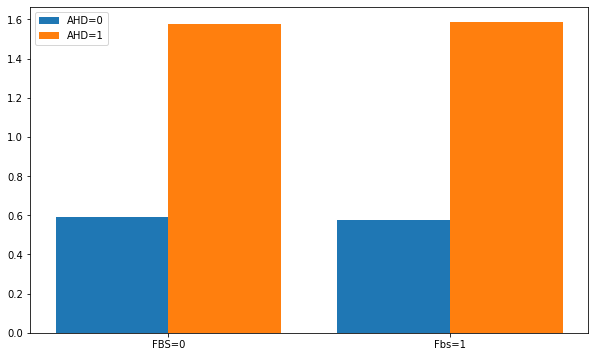

In [337]:
FBS1 = df[df["Fbs"] == 0]
FBS2 = df[df["Fbs"] == 1]  


groups = ['FBS=0', 'Fbs=1']

negative = [FBS1[FBS1["AHD"] == 'No'].count()[0], FBS2[FBS2["AHD"] == 'No'].count()[0]]  

positive = [FBS1[FBS1["AHD"] == 'Yes'].count()[0], FBS2[FBS2["AHD"] == 'Yes'].count()[0]]  

negative_Oldpeak_means_wrt_Fbs = [FBS1.groupby("AHD")["Oldpeak"].mean()[0], FBS2.groupby("AHD")["Oldpeak"].mean()[0]]   

positive_Oldpeak_means_wrt_Fbs = [FBS1.groupby("AHD")["Oldpeak"].mean()[1], FBS2.groupby("AHD")["Oldpeak"].mean()[1]]

# Multiple bar Chart
x_axis = np.arange(len(groups))

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

plt.bar(x_axis -0.2, negative_Oldpeak_means_wrt_Fbs, width=0.4, label = 'AHD=0')
plt.bar(x_axis +0.2, positive_Oldpeak_means_wrt_Fbs, width=0.4, label = 'AHD=1')

plt.xticks(x_axis, groups)
plt.legend()
plt.show()

###[Slope, RestECG] and AHD

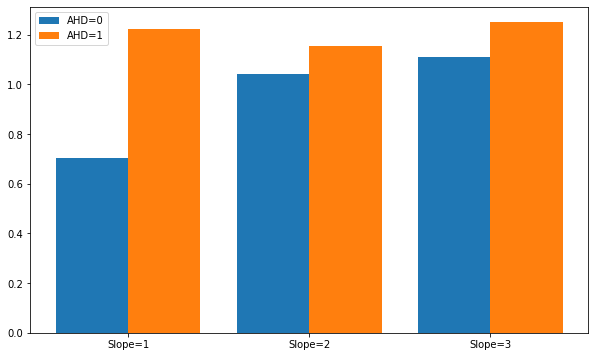

In [338]:
Slope1 = df[df["Slope"] == 1]
Slope2 = df[df["Slope"] == 2]  
Slope3 = df[df["Slope"] == 3] 

groups = ['Slope=1', 'Slope=2', 'Slope=3']

negative = [Slope1[Slope1["AHD"] == 'No'].count()[0], Slope2[Slope2["AHD"] == 'No'].count()[0], Slope3[Slope3["AHD"] == 'No'].count()[0]]  

positive = [Slope1[Slope1["AHD"] == 'Yes'].count()[0], Slope2[Slope2["AHD"] == 'Yes'].count()[0], Slope3[Slope3["AHD"] == 'Yes'].count()[0]]  

negative_RestECG_means_wrt_Slope = [Slope1.groupby("AHD")["RestECG"].mean()[0], Slope2.groupby("AHD")["RestECG"].mean()[0], Slope3.groupby("AHD")["RestECG"].mean()[0]]   

positive_RestECG_means_wrt_Slope = [Slope1.groupby("AHD")["RestECG"].mean()[1], Slope2.groupby("AHD")["RestECG"].mean()[1], Slope3.groupby("AHD")["RestECG"].mean()[1]]

# Multiple bar Chart
x_axis = np.arange(len(groups))

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

plt.bar(x_axis -0.2, negative_RestECG_means_wrt_Slope, width=0.4, label = 'AHD=0')
plt.bar(x_axis +0.2, positive_RestECG_means_wrt_Slope, width=0.4, label = 'AHD=1')

plt.xticks(x_axis, groups)
plt.legend()
plt.show()

#-----------------------------------------------------------------FINAL PART---------------------------------------------------------

### In this part, firsty we will perform stati

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# the library to perform statistical tests
from scipy import stats
from scipy import special
from os.path import join
import seaborn as sns

%matplotlib inline

##Statistical tests to check whether the values of chest pain, RestBP and Chol contribute to heart disease or not.

 Is there a difference between the mean of RestBP values of AHD=0 and AHD=1 people?
 We should perform a Z test since we explore the relationship between a numerical data (RestBP values) and a categorical data with number of groups <= 2 and large samples (AHD = 0 or AHD = 1, n = 301).





In [340]:
test_type =  "RestBP"

yes_disease = df[df["AHD"] == "Yes"][test_type] 
no_disease = df[df["AHD"] == "No"][test_type]       

In [341]:
print(f"mean rest BP of people having disease: {yes_disease.mean():.2f}")

mean rest BP of people having disease: 134.62


In [342]:
print(f"mean rest BP of people having no disease: {no_disease.mean():.2f}")

mean rest BP of people having no disease: 129.26


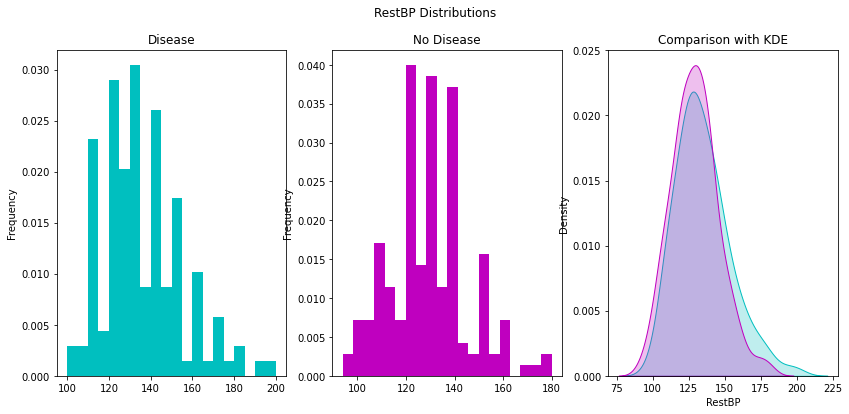

In [343]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
yes_disease.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="c", density=True)
ax[0].set_title("Disease")

no_disease.plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title("No Disease")

sns.kdeplot(yes_disease, shade=True, label="Disease", ax=ax[2], color="c")
sns.kdeplot(no_disease, shade=True, label="No Disease", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("RestBP Distributions")
plt.show()

 Because Sex and AHD are categorical data, use Chi-Square test

In [344]:
crosstab_df = pd.crosstab(df["AHD"], df["ChestPain"])
crosstab_df

ChestPain,asymptomatic,nonanginal,nontypical,typical
AHD,,,,
No,39,67,41,16
Yes,104,18,9,7


In [345]:
# chi-square test
chiRes = stats.chi2_contingency(crosstab_df)
# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print(f'degree of freedom: {chiRes[2]}')
print('expected contingency table') 
print(chiRes[3])
alpha = 0.05
chi2_test_stat, p_value, dof, expected_freqs = stats.chi2_contingency(crosstab_df)
print("\n")
result = "independet" if p_value > alpha else "not independent"
print(f"AHD and ChestPain status are {result}")

chi-square statistic: 80.27158431914995
p-value: 2.683988051075706e-17
degree of freedom: 3
expected contingency table
[[77.43853821 46.02990033 27.07641196 12.4551495 ]
 [65.56146179 38.97009967 22.92358804 10.5448505 ]]


AHD and ChestPain status are not independent


In [346]:
crosstab_df = pd.crosstab(df["AHD"], df["Sex"])
crosstab_df

Sex,0,1
AHD,,
No,71,92
Yes,25,113


##Statistical tests to check whether age and sex contribute to heart disease or not

for Sex

In [347]:
# chi-square test
chiRes = stats.chi2_contingency(crosstab_df)
# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print(f'degree of freedom: {chiRes[2]}')
print('expected contingency table') 
print(chiRes[3])

alpha = 0.05
chi2_test_stat, p_value, dof, expected_freqs = stats.chi2_contingency(crosstab_df)
print("\n")
result = "independet" if p_value > alpha else "not independent"
print(f"AHD and Sex status are {result}")

chi-square statistic: 21.114211376082398
p-value: 4.327071822758125e-06
degree of freedom: 1
expected contingency table
[[ 51.98671096 111.01328904]
 [ 44.01328904  93.98671096]]


AHD and Sex status are not independent


for Age

In [348]:
crosstab_df = pd.crosstab(df["AHD"], df["Age"])
crosstab_df

Age,29,34,35,37,38,39,40,41,42,43,...,65,66,67,68,69,70,71,74,76,77
AHD,,,,,,,,,,,,,,,,,,,,,
No,1,2,2,2,1,3,1,9,7,5,...,4,4,3,2,2,1,3,1,1,0
Yes,0,0,2,0,1,1,2,1,1,3,...,4,3,6,2,1,3,0,0,0,1


In [349]:
# chi-square test
chiRes = stats.chi2_contingency(crosstab_df)
# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print(f'degree of freedom: {chiRes[2]}')
print('expected contingency table') 
print(chiRes[3])

alpha = 0.05
chi2_test_stat, p_value, dof, expected_freqs = stats.chi2_contingency(crosstab_df)
print("\n")
result = "independet" if p_value > alpha else "not independent"
print(f"AHD and Age status are {result}")

chi-square statistic: 51.17026599489816
p-value: 0.11093870021480248
degree of freedom: 40
expected contingency table
[[ 0.54152824  1.08305648  2.16611296  1.08305648  1.08305648  2.16611296
   1.62458472  5.41528239  4.33222591  4.33222591  5.95681063  4.33222591
   3.79069767  2.7076412   3.79069767  2.7076412   3.79069767  6.49833887
   6.49833887  3.79069767  8.66445183  4.33222591  5.95681063  9.20598007
  10.28903654  7.58139535  6.49833887  4.33222591  5.95681063  4.87375415
   5.41528239  4.33222591  3.79069767  4.87375415  2.16611296  1.62458472
   2.16611296  1.62458472  0.54152824  0.54152824  0.54152824]
 [ 0.45847176  0.91694352  1.83388704  0.91694352  0.91694352  1.83388704
   1.37541528  4.58471761  3.66777409  3.66777409  5.04318937  3.66777409
   3.20930233  2.2923588   3.20930233  2.2923588   3.20930233  5.50166113
   5.50166113  3.20930233  7.33554817  3.66777409  5.04318937  7.79401993
   8.71096346  6.41860465  5.50166113  3.66777409  5.04318937  4.12624585
   4.

##Statistical tests to check if significant differences exist between age groups and sex that suffer from heart disease

In [350]:
AHD_1 = df[df["AHD"] == "Yes"] 
AHD_1_SEX_0 = AHD_1[AHD_1["Sex"] == 0]
AHD_1_SEX_1 = AHD_1[AHD_1["Sex"] == 1]
AHD_1_SEX_0_AGE = AHD_1_SEX_0["Age"]
AHD_1_SEX_1_AGE = AHD_1_SEX_1["Age"]
stats.ttest_ind(AHD_1_SEX_0_AGE, AHD_1_SEX_1_AGE, equal_var=False) 

Ttest_indResult(statistic=2.357096229797942, pvalue=0.02166586544758109)

##Statistical tests to check how all those attributes contribute to heart disease

for Fbs. Because Fbs and AHD are categorical data, use Chi-Square test

In [351]:
crosstab_df = pd.crosstab(df["AHD"], df["Fbs"])
crosstab_df

Fbs,0,1
AHD,,
No,140,23
Yes,117,21


In [352]:
# chi-square test
chiRes = stats.chi2_contingency(crosstab_df)
# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print(f'degree of freedom: {chiRes[2]}')
print('expected contingency table') 
print(chiRes[3])
alpha = 0.05
chi2_test_stat, p_value, dof, expected_freqs = stats.chi2_contingency(crosstab_df)
print("\n")
result = "independet" if p_value > alpha else "not independent"
print(f"AHD and FBS status are {result}")

chi-square statistic: 0.011481178418399334
p-value: 0.9146697741891682
degree of freedom: 1
expected contingency table
[[139.17275748  23.82724252]
 [117.82724252  20.17275748]]


AHD and FBS status are independet


for RestECG. Because RestECG and AHD are categorical data, use Chi-Square test

In [353]:
crosstab_df = pd.crosstab(df["AHD"], df["RestECG"])
crosstab_df

RestECG,0,1,2
AHD,,,
No,95,1,67
Yes,55,3,80


In [354]:
# chi-square test
chiRes = stats.chi2_contingency(crosstab_df)
# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print(f'degree of freedom: {chiRes[2]}')
print('expected contingency table') 
print(chiRes[3])
alpha = 0.05
chi2_test_stat, p_value, dof, expected_freqs = stats.chi2_contingency(crosstab_df)
print("\n")
result = "independet" if p_value > alpha else "not independent"
print(f"AHD and RestECG status are {result}")

chi-square statistic: 10.81451720458789
p-value: 0.004483915573703415
degree of freedom: 2
expected contingency table
[[81.22923588  2.16611296 79.60465116]
 [68.77076412  1.83388704 67.39534884]]


AHD and RestECG status are not independent


For ExAng. Because ExAng and AHD are categorical data, use Chi-Square test

In [355]:
crosstab_df = pd.crosstab(df["AHD"], df["ExAng"])
crosstab_df

ExAng,0,1
AHD,,
No,140,23
Yes,63,75


In [356]:
# chi-square test
chiRes = stats.chi2_contingency(crosstab_df)
# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print(f'degree of freedom: {chiRes[2]}')
print('expected contingency table') 
print(chiRes[3])
alpha = 0.05
chi2_test_stat, p_value, dof, expected_freqs = stats.chi2_contingency(crosstab_df)
print("\n")
result = "independet" if p_value > alpha else "not independent"
print(f"AHD and ExAng status are {result}")

chi-square statistic: 53.28518773588665
p-value: 2.884735454025286e-13
degree of freedom: 1
expected contingency table
[[109.93023256  53.06976744]
 [ 93.06976744  44.93023256]]


AHD and ExAng status are not independent


For Slope. Because Slope and AHD are categorical data, use Chi-Square test

In [357]:
crosstab_df = pd.crosstab(df["AHD"], df["Slope"])
crosstab_df

Slope,1,2,3
AHD,,,
No,105,49,9
Yes,36,90,12


In [358]:
# chi-square test
chiRes = stats.chi2_contingency(crosstab_df)
# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print(f'degree of freedom: {chiRes[2]}')
print('expected contingency table') 
print(chiRes[3])
alpha = 0.05
chi2_test_stat, p_value, dof, expected_freqs = stats.chi2_contingency(crosstab_df)
print("\n")
result = "independet" if p_value > alpha else "not independent"
print(f"AHD and Slope status are {result}")

chi-square statistic: 44.51874928268029
p-value: 2.1521692534947627e-10
degree of freedom: 2
expected contingency table
[[76.35548173 75.27242525 11.37209302]
 [64.64451827 63.72757475  9.62790698]]


AHD and Slope status are not independent


For Thal. Because Thal and AHD are categorical data, use Chi-Square test

In [359]:
crosstab_df = pd.crosstab(df["AHD"], df["Thal"])
crosstab_df

Thal,fixed,normal,reversable
AHD,,,
No,6,129,28
Yes,12,37,89


In [360]:
# chi-square test
chiRes = stats.chi2_contingency(crosstab_df)
# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print(f'degree of freedom: {chiRes[2]}')
print('expected contingency table') 
print(chiRes[3])
alpha = 0.05
chi2_test_stat, p_value, dof, expected_freqs = stats.chi2_contingency(crosstab_df)
print("\n")
result = "independet" if p_value > alpha else "not independent"
print(f"AHD and Thal status are {result}")

chi-square statistic: 83.28952130229499
p-value: 8.201820286056396e-19
degree of freedom: 2
expected contingency table
[[ 9.74750831 89.89368771 63.35880399]
 [ 8.25249169 76.10631229 53.64119601]]


AHD and Thal status are not independent


For MaxHR. Because MaxHR is numerical data and AHD is categorical data and AHD's group size is <= 2 and our sample is large, use Z test.

In [361]:
test_type =  "MaxHR"

yes_disease = df[df["AHD"] == "Yes"][test_type] 
no_disease = df[df["AHD"] == "No"][test_type]

In [362]:
print(f"mean MaxHR of people having disease: {yes_disease.mean():.2f}")

mean MaxHR of people having disease: 139.14


In [363]:
print(f"mean MaxHR of people having no disease: {no_disease.mean():.2f}")

mean MaxHR of people having no disease: 158.64


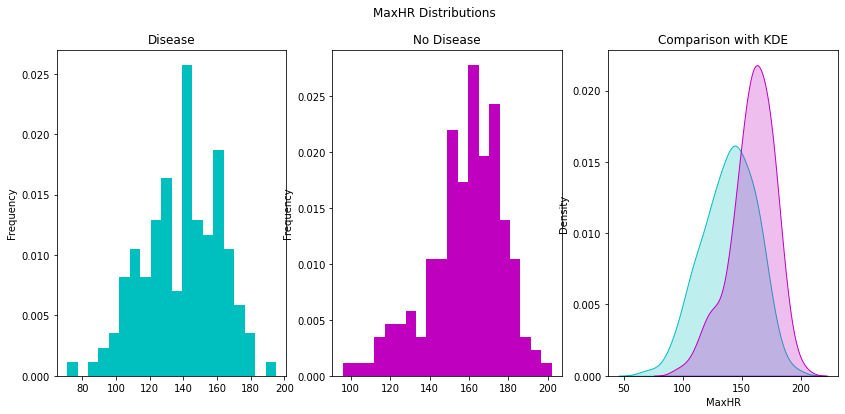

In [364]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
yes_disease.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="c", density=True)
ax[0].set_title("Disease")

no_disease.plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title("No Disease")

sns.kdeplot(yes_disease, shade=True, label="Disease", ax=ax[2], color="c")
sns.kdeplot(no_disease, shade=True, label="No Disease", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("MaxHR Distributions")
plt.show()

For Oldpeak. Because Oldpeak is numerical data and AHD is categorical data and AHD's group size is <= 2 and our sample is large, use Z test.

In [365]:
test_type =  "Oldpeak"

yes_disease = df[df["AHD"] == "Yes"][test_type] 
no_disease = df[df["AHD"] == "No"][test_type]

In [366]:
print(f"mean Oldpeak of people having disease: {yes_disease.mean():.2f}")

mean Oldpeak of people having disease: 1.58


In [367]:
print(f"mean Oldpeak of people having no disease: {no_disease.mean():.2f}")

mean Oldpeak of people having no disease: 0.59


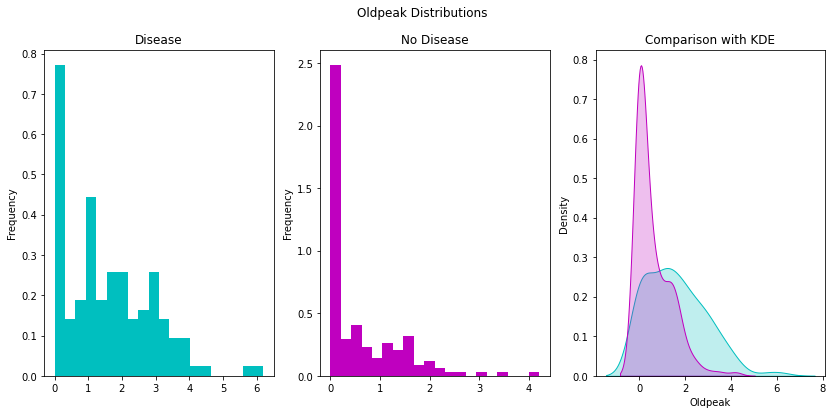

In [368]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
yes_disease.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="c", density=True)
ax[0].set_title("Disease")

no_disease.plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title("No Disease")

sns.kdeplot(yes_disease, shade=True, label="Disease", ax=ax[2], color="c")
sns.kdeplot(no_disease, shade=True, label="No Disease", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Oldpeak Distributions")
plt.show()

For Ca. Because Ca is numerical data and AHD is categorical data and AHD's group size is <= 2 and our sample is large, use Z test.

In [369]:
test_type =  "Ca"

yes_disease = df[df["AHD"] == "Yes"][test_type] 
no_disease = df[df["AHD"] == "No"][test_type]

In [370]:
print(f"mean Ca of people having disease: {yes_disease.mean():.2f}")

mean Ca of people having disease: 1.14


In [371]:
print(f"mean Ca of people having no disease: {no_disease.mean():.2f}")

mean Ca of people having no disease: 0.28


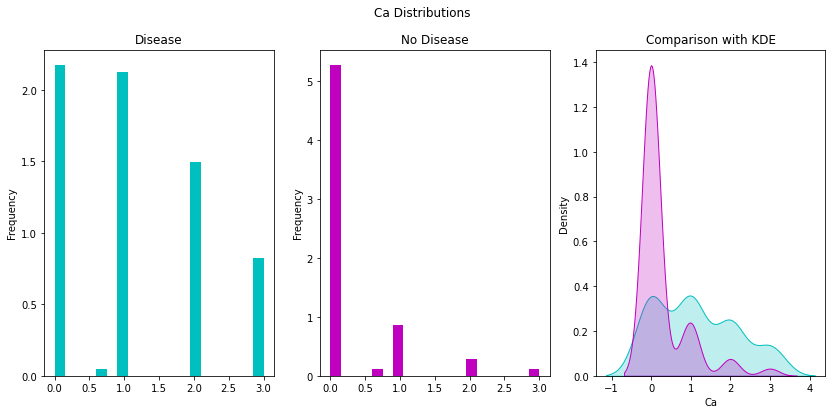

In [372]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
yes_disease.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="c", density=True)
ax[0].set_title("Disease")

no_disease.plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title("No Disease")

sns.kdeplot(yes_disease, shade=True, label="Disease", ax=ax[2], color="c")
sns.kdeplot(no_disease, shade=True, label="No Disease", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Ca Distributions")
plt.show()

###Utilizing at least four new features using extra datasets in hypothesis testing

Hypothesis Test: We want to test whether there is significant differences in terms of **bmi** among people who have **heart_disease** and those who don't. (People with heart_disease==1 vs People with heart_disease== 0)

Null Hypothesis ( H0 ): Means of **bmi** scores for both groups are the same

H0:μa1=μa2 

Alternative Hypothesis ( HA ): Means of **bmi** scores for both groups are different.

HA:  Means  μa1&μa2  are not same.

Significance level**: As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too.

In [373]:
h_dnot = df_additional[df_additional['heart_disease'] == 0]
h_d=  df_additional[df_additional['heart_disease'] == 1]
print(f'Number of people without heart disease: {len(h_dnot)}')
print(f'Number of people with heart disease: {len(h_d)}')

Number of people without heart disease: 4666
Number of people with heart disease: 243


In [374]:
def plot_patient_health(patient_health_name): #functıon for plotting the histograms 
  fig, ax = plt.subplots(1, 3, figsize=(16,4))
  h_dnot[patient_health_name].hist(ax=ax[0], bins=20, color="blue", density=True)
  ax[0].set_title("heart_disease == 0")
  ax[0].set_xlabel(patient_health_name)
  h_d[patient_health_name].hist(ax=ax[1], bins=20, color="green", density=True)
  ax[1].set_title("heart_disease == 1")
  ax[1].set_xlabel(patient_health_name)
  sns.kdeplot(h_dnot[patient_health_name], shade=True, label="0", ax=ax[2], color="blue")
  sns.kdeplot(h_d[patient_health_name], shade=True, label="1", ax=ax[2], color="green")
  ax[2].set_title("Comparison with KDE")
  ax[2].set_xlabel(patient_health_name)
  plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)

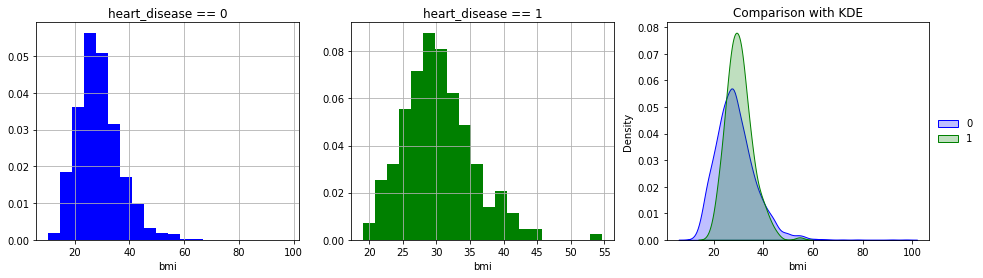

In [375]:
plot_patient_health("bmi")

stats.levene: We used this function to see the variances for two samples. The Null-Hypothesis is that the equal_var is True and the Alternative hypothesis is that the equal_var is False. İf the pvalue returned by stats.levene returns pvalue which is smaller than 0.05, then we reject the Null-hypothesis and make equal_var False

In [376]:
stats.levene(h_d["bmi"], h_dnot["bmi"])

LeveneResult(statistic=32.41832428196188, pvalue=1.3154232128136836e-08)

In [377]:
print(h_d["bmi"].var())
print(h_dnot["bmi"].var())

27.986339489167808
63.33679201760084


In [378]:
from scipy.stats.stats import ttest_ind
ttest_ind(h_d["bmi"], h_dnot["bmi"], equal_var=False)

Ttest_indResult(statistic=4.173089190747034, pvalue=3.932890998534075e-05)

**Null Hypothesis**( H0 ): Means of **average_glucose_level** for both groups are the same

H0:μa1=μa2 

**Alternative Hypothesis** ( HA ): Means of **average_glucose_level** for both groups are dıfferent

In [379]:
A_G_level = "avg_glucose_level"
female = df_additional[df_additional["gender"] == "Female"][A_G_level] 
male = df_additional[df_additional["gender"] == "Male"][A_G_level] 

In [380]:
stats.levene(male, female)

LeveneResult(statistic=10.568214168579578, pvalue=0.0011582581982389009)

In [381]:
print(male.var())
print(female.var())

2162.195892361665
1833.9837201928292


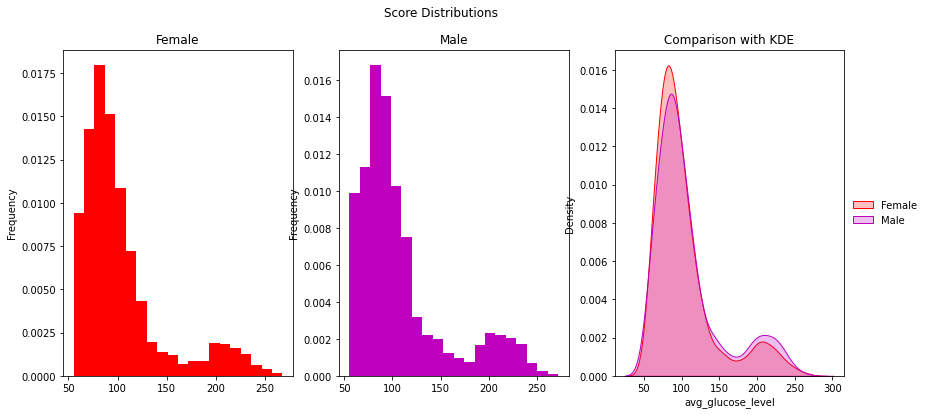

In [382]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
female.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="r", density=True)
ax[0].set_title("Female")

male.plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title("Male")

sns.kdeplot(female, shade=True, label="Female", ax=ax[2], color="r")
sns.kdeplot(male, shade=True, label="Male", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)
plt.suptitle("Score Distributions")
plt.show()

In [383]:
ttest_ind(female, male, equal_var=True)

Ttest_indResult(statistic=-3.7288092069400323, pvalue=0.00019455668478857545)

**Null Hypothesis ($H_0$)**: Means of `stroke` for both groups are the same

$ H_0: \mu_{a_1} = \mu_{a_2}$

**Alternative Hypothesis ($H_A$)**: Means of `stroke` for both groups are dıfferent

In [384]:
S_true = df_additional[df_additional["stroke"] == 1][A_G_level]  
S_not = df_additional[df_additional["stroke"] ==0 ][A_G_level] 

In [385]:
stats.levene(S_true, S_not)

LeveneResult(statistic=94.86059627633308, pvalue=3.2428654571761396e-22)

In [386]:
print(S_true.var())
print(S_not.var())

3901.5072966231132
1848.810648562


As we can see in the figures down below, people who have higher average glucoses level are much more likely to have a stroke.

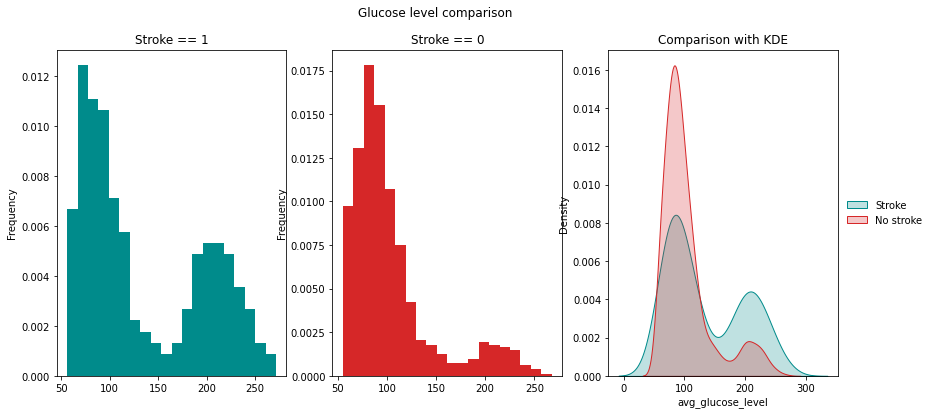

In [387]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
S_true.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="darkcyan", density=True)
ax[0].set_title("Stroke == 1")

S_not.plot(kind="hist", ax=ax[1], bins=20, label="none", color="tab:red", density=True)
ax[1].set_title("Stroke == 0")

sns.kdeplot(S_true, shade=True, label="Stroke", ax=ax[2], color="darkcyan")
sns.kdeplot(S_not, shade=True, label="No stroke", ax=ax[2], color="tab:red")
ax[2].set_title("Comparison with KDE")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)
plt.suptitle("Glucose level comparison")
plt.show()

In [388]:
ttest_ind(S_true, S_not, equal_var=False)

Ttest_indResult(statistic=7.001495143391008, pvalue=3.1279262491339954e-11)

**Null Hypothesis ($H_0$)**: Means of `stroke` for both groups are the same

$ H_0: \mu_{a_1} = \mu_{a_2}$

**Alternative Hypothesis ($H_A$)**: Means of `stroke` in people having  `heart_disease` is higher than in people not having `heart_disease`

In [389]:
h_dnot = df_additional[df_additional['heart_disease'] == 0]
h_d=  df_additional[df_additional['heart_disease'] == 1]
print(f'Number of people without heart disease: {len(h_dnot)}')
print(f'Number of people with heart disease: {len(h_d)}')

Number of people without heart disease: 4666
Number of people with heart disease: 243


As we can see in fugure below people having a stroke are more likely to have a heart diseasw, and in thge above figure we saw that the more the average gluscode level a person has it is more likely for the person to get a stroke, so we can presume that people having a higher average glucose level also have a higher chance of having a heart disease.

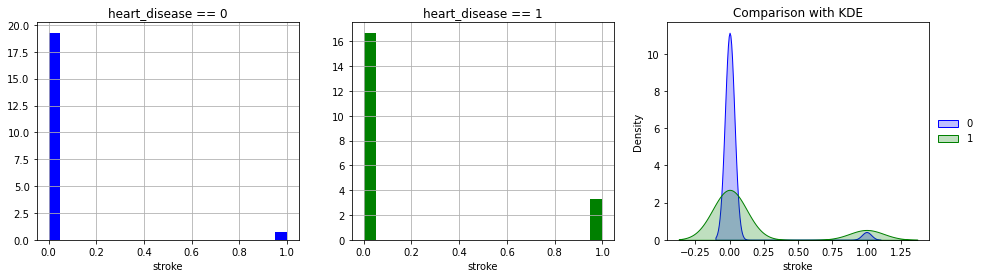

In [390]:
plot_patient_health("stroke")

In [391]:
stats.levene(h_d["stroke"], h_dnot["stroke"])

LeveneResult(statistic=95.17556029346373, pvalue=2.774232441240542e-22)

In [392]:
print(h_d["stroke"].var())
print(h_dnot["stroke"].var())

0.138081148182158
0.03491509352047866


In [393]:
ttest_ind(h_d["stroke"], h_dnot["stroke"], equal_var=False)

Ttest_indResult(statistic=5.3508761655765404, pvalue=1.9881561135061718e-07)

**Null Hypothesis ($H_0$)**: Means of `hypertension` for both groups are the same

$ H_0: \mu_{a_1} = \mu_{a_2}$

**Alternative Hypothesis ($H_A$)**: Means of `hypertension` for both groups are dıfferent



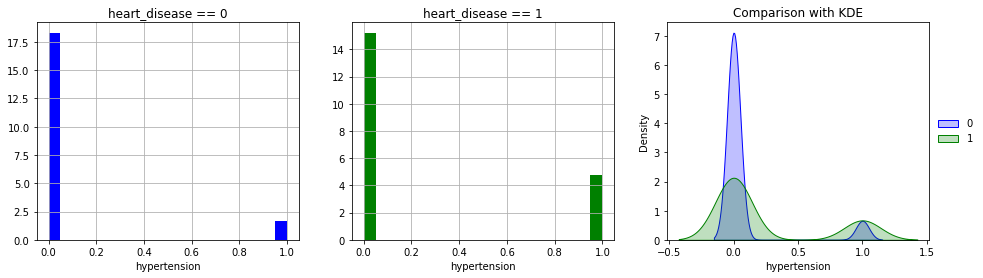

In [394]:
plot_patient_health("hypertension")

In [395]:
stats.levene(h_d["hypertension"], h_dnot["hypertension"])

LeveneResult(statistic=66.91865445325664, pvalue=3.5712092295011763e-16)

In [396]:
print(h_d["hypertension"].var())
print(h_dnot["hypertension"].var())

0.18246437438356652
0.07714877963733494


In [397]:
ttest_ind(h_d["hypertension"], h_dnot["hypertension"], equal_var=False)

Ttest_indResult(statistic=5.575598720302154, pvalue=6.322914729818186e-08)

**Null Hypothesis ($H_0$)**: Means of `hypertension` for both groups are the same

$ H_0: \mu_{a_1} = \mu_{a_2}$

**Alternative Hypothesis ($H_A$)**: Means of `hypertension` for both groups are dıfferent

In [398]:
H_T = "hypertension"
female = df_additional[df_additional["gender"] == "Female"][H_T] 
male = df_additional[df_additional["gender"] == "Male"][H_T] 

In [399]:
stats.levene(male, female)

LeveneResult(statistic=2.3349956638940874, pvalue=0.12655980959315713)

In [400]:
print(male.var())
print(female.var())

0.08960666582551881
0.07916195454623164


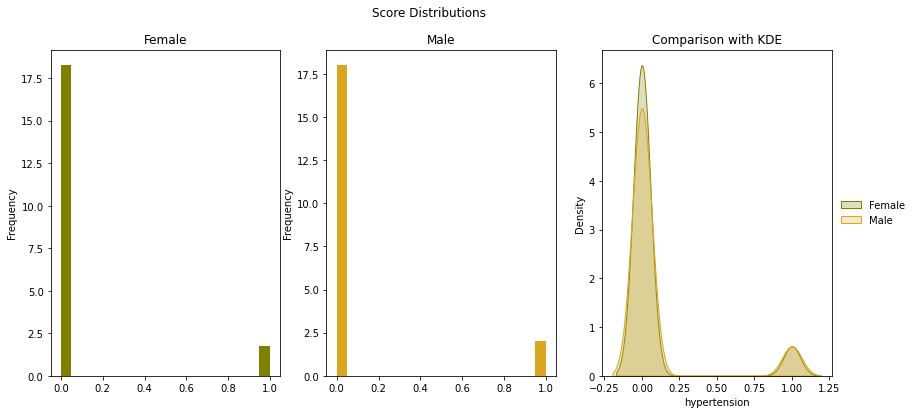

In [401]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
female.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="olive", density=True)
ax[0].set_title("Female")

male.plot(kind="hist", ax=ax[1], bins=20, label="none", color="goldenrod", density=True)
ax[1].set_title("Male")

sns.kdeplot(female, shade=True, label="Female", ax=ax[2], color="olive")
sns.kdeplot(male, shade=True, label="Male", ax=ax[2], color="goldenrod")
ax[2].set_title("Comparison with KDE")

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)
plt.suptitle("Score Distributions")
plt.show()

In [402]:
ttest_ind(female, male, equal_var=True)

Ttest_indResult(statistic=-1.5280692601757575, pvalue=0.12655980959320542)

#Our findings based on exploratory analysis and hypothesis testing,statistical analysis

RestBP

We found that RestBP values are more likely to be higher among the people who have heart disease compared to the one who haven’t.

Chestpain

Our results shows that aysymptomatic chestpain is the most common type among the AHD=1 people. Having chestpain is not a clue for having heart disease.

Sex

We found that AHD=1 people are mostly men.

Age

According to our grouping for different age ranges, the age groups bigger than 54 are the one who have heart diesease mostly.

Fbs

We found that having heart disease does not depend on Fbs values by Chi-Square test. In addition to that, our visualization for AHD and Fbs values which we did in the exploratory analysis part supports our test result.

RestECG

We found that RestECG = 2 is not common among the AHD=1 people. That’s why we cannot say that as RestECG increases the more like to having heart disease. However, we found by Chi-Square test that RestECG and AHD are dependent features and as we undestand from our exploratory analysis, AHD=0 people are generally RestECG=0 people.

ExAng

We found that AHD=1 people have mostly ExAng values as 1 instead of 0.

Thal

Reversable Thal values may be a good sign for having heart disease.

MaxHR

According to the Z test we conducted, MaxHR values of the people who have heart disease are higher than the others.

Oldpeak

As we see in our Z test, AHD=1 people have a higher mean of oldpeak levels.

Ca

Ca is another feature which give an idea about having disease probability since we found higher levels among the AHD=1 people.

#MACHINE LEARNING

#Now, let's apply Logistic Regression, KNN, Decision tree and Support Vector Machine as classification models.  

In the below correlation matrix, we 
The results from the below correlation matrix shows that there is no  prompt the need for feature selection. To do this I employed the Boruta Feature Selection algorithm which is a wrapper method built around the random forest classification algorithm. It tries to capture all the important, interesting features in a data set with respect to an outcome variable.
Feature Selection: Since having irrelevant features in a data set can decrease the accuracy of the models applied, I used the Boruta Feature Selection technique to select the most important features which were later used to build different models.

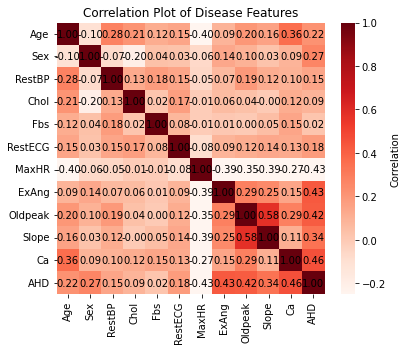

In [403]:
df_copy_for_cor = df.copy()
df_copy_for_cor["AHD"].replace({"Yes":1, "No":0}, inplace=True)
df_copy_for_cor = df_copy_for_cor.astype({'AHD':'int'})

DiseaseFeatures = df_copy_for_cor
corr = DiseaseFeatures.corr()
corr = corr.round(decimals = 2)
fig = plt.figure(figsize  = (6,5))
plt.title('Correlation Plot of Disease Features')
heatmap = sns.heatmap(corr, cmap = 'Reds', annot = True, vmin = -0.25, vmax = 1.0, fmt = '.2f',
                      cbar_kws={'label': 'Correlation'}, annot_kws={'color': 'black'})

In [404]:
df[df["AHD"] == "Yes"]

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Categorical Age
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,65 - 65+
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,65 - 65+
7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes,60 - 64
9,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,Yes,60 - 64
10,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,Yes,50 - 54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes,55 - 59
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes,45 - 49
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes,65 - 65+
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes,55 - 59


In [405]:
df[df["AHD"] == "No"]

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Categorical Age
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.000000,fixed,No,60 - 64
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.000000,normal,No,35 - 39
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.000000,normal,No,40 - 44
6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.000000,normal,No,55 - 59
8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.000000,normal,No,55 - 59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,56,1,nontypical,130,221,0,2,163,0,0.0,1,0.000000,reversable,No,55 - 59
290,56,1,nontypical,120,240,0,0,169,0,0.0,3,0.000000,normal,No,55 - 59
292,55,0,nontypical,132,342,0,0,166,0,1.2,1,0.000000,normal,No,55 - 59
296,41,1,nontypical,120,157,0,0,182,0,0.0,1,0.000000,normal,No,40 - 44


As you can see, we have a balanced proportions for AHD = 1 and AHD = 0 people. 

##Prepare our data for classification models

In [406]:
df = df.drop(["Categorical Age"], axis=1)

In [407]:
# separate features and the target column
X = df.drop("AHD", axis=1)
y = df["AHD"]

In [408]:
X # dataframe without the target variable

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.000000,fixed
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.000000,normal
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.000000,reversable
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.000000,normal
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.000000,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.000000,reversable
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.000000,reversable
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.000000,reversable
302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.000000,normal


In [409]:
y # target variable

1       No
2      Yes
3      Yes
4       No
5       No
      ... 
299    Yes
300    Yes
301    Yes
302    Yes
303     No
Name: AHD, Length: 301, dtype: object

In [410]:
X

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.000000,fixed
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.000000,normal
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.000000,reversable
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.000000,normal
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.000000,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.000000,reversable
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.000000,reversable
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.000000,reversable
302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.000000,normal


transform categorical data into numerical data (chestpain, Thal)

In [411]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
ordinal = OrdinalEncoder()
X = ordinal.fit_transform(X)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# ordinal encode the breast cancer dataset
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
# define the location of the dataset

# load the dataset

# retrieve the array of data
data = df.values
# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)
# ordinal encode input variables
ordinal_encoder = OrdinalEncoder()
X = ordinal_encoder.fit_transform(X)
# ordinal encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# summarize the transformed data
print('Input', X.shape)
print(X[:5, :])
print('Output', y.shape)
print(y[:5])

Input (301, 13)
[[ 29.   1.   3.  30.  64.   1.   2.  42.   0.  22.   2.   0.   0.]
 [ 33.   1.   0.  39. 111.   0.   2.   3.   1.  15.   1.   4.   1.]
 [ 33.   1.   0.  13.  60.   0.   2.  22.   1.  25.   1.   3.   2.]
 [  3.   1.   1.  21.  80.   0.   0.  77.   0.  32.   2.   0.   1.]
 [  7.   0.   2.  21.  35.   0.   2.  64.   0.  14.   0.   0.   1.]]
Output (301,)
[0 1 1 0 0]


In [412]:
from sklearn.model_selection import train_test_split

# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=42)
# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)

In [413]:
X_train.shape

(240, 13)

In [414]:
X_test.shape

(30, 13)

In [415]:
y_train.shape

(240,)

In [416]:
y_test.shape

(30,)

Because we will apply regression in the following cells and it works better with numerical data, we convert our categorical data into numerical data. (ChestPain and Thal)

In [417]:
df['ChestPain'].replace(['typical','nontypical','nonanginal','asymptomatic'],[1,2,3,4],inplace=True)
df['Thal'].replace(['normal','reversable','fixed'],[1,2,3],inplace=True)

In [418]:
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,3,No
2,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,1,Yes
3,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,2,Yes
4,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,1,No
5,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,2,Yes
300,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,2,Yes
301,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,2,Yes
302,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,1,Yes


In [419]:
X

array([[29.,  1.,  3., ...,  2.,  0.,  0.],
       [33.,  1.,  0., ...,  1.,  4.,  1.],
       [33.,  1.,  0., ...,  1.,  3.,  2.],
       ...,
       [23.,  1.,  0., ...,  1.,  2.,  2.],
       [23.,  0.,  2., ...,  1.,  2.,  1.],
       [ 4.,  1.,  1., ...,  0.,  1.,  1.]])

## Linear Regression

Negative coefficients points out that there is a negative correlation between the attribute and AHD values

For this reason it is observed that ChestPain, Fbs and MaxHr have negative correlation with AHD while other have positive correlation
MSE is mean square error and it shows the closeness of the regreassion line to the set of data points which is 0.11897164925768411

RMSE is Root Mean Square Error. it is the standard deviation of the residuals that measure how far from the regression line set of data points are. Here the value is 0.3449226714173542

MAE is Mean Absolute Error and it is a measure of the accuracy for continuous variables which is 0.27491707142611826 here

In [420]:
from sklearn.linear_model import LinearRegression
weatherFeatures = ['Age', 'Sex', 'ChestPain','RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal']
X = df[weatherFeatures].values
y = df['AHD'].values


from sklearn.preprocessing import OneHotEncoder
ordinal = OrdinalEncoder()
X = ordinal.fit_transform(X)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# ordinal encode the breast cancer dataset
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
# define the location of the dataset

# load the dataset

# retrieve the array of data
data = df.values
# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)
# ordinal encode input variables
ordinal_encoder = OrdinalEncoder()
X = ordinal_encoder.fit_transform(X)
# ordinal encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# summarize the transformed data

# creating regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
heart_disease_Model = LinearRegression()
heart_disease_Model.fit(X_train, y_train)

# coefficients
coeff_df = pd.DataFrame(heart_disease_Model.coef_, weatherFeatures, columns=['Coefficient'])  
print(coeff_df)

# mean error
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = heart_disease_Model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("mse: {}".format(mse))
print("rmse: {}".format(rmse))
print("mae: {}".format(mae))

           Coefficient
Age           0.000502
Sex           0.126620
ChestPain     0.095350
RestBP        0.002911
Chol          0.000878
Fbs          -0.063133
RestECG       0.030775
MaxHR         0.000207
ExAng         0.195112
Oldpeak       0.004368
Slope         0.072644
Ca            0.111109
Thal          0.156488
mse: 0.1190543059558377
rmse: 0.3450424697857319
mae: 0.2716217462054808


### We prepared the data. Let's apply our classification models.

In [421]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

###First, Logistic Regression. We used this method because we have a binary response variable: AHD(0 or 1). We want to predict the probability of AHD=0 or 1. We fit an "S" shaped logistic function in order to predict target values (0 or 1).

We got 87% accuracy on trainig data and 76% in testing data without overfitting. 
When we applied Grid search as the hyperparameter tuning, we observed that the accuracy level decreased. That's why we didn't use hyperparameter tuning for this model.
Here's how we implemented.

In [422]:
# Creating instance of LogisticRegression

model_Log=LogisticRegression(solver='liblinear')

In [423]:
model_Log.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

Accuracy on training data

In [424]:
X_train_predict=model_Log.predict(X_train)

training_data_acc=accuracy_score(X_train_predict,y_train)

print('acc score=',training_data_acc)

acc score= 0.8208333333333333


Accuracy on testing data

In [425]:
X_test_predict=model_Log.predict(X_test)

testing_data_acc=accuracy_score(X_test_predict,y_test)

print('acc score=',testing_data_acc)

acc score= 0.8852459016393442


In [426]:
confusion_matrix(X_test_predict,y_test)

array([[31,  4],
       [ 3, 23]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



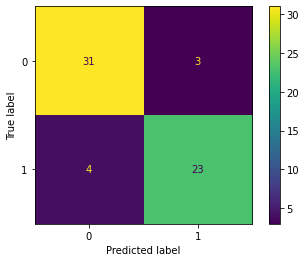

In [427]:

plot_confusion_matrix(model_Log, X_test, y_test)  
plt.show()

In [428]:

print(classification_report(X_test_predict,y_test))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        35
           1       0.85      0.88      0.87        26

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



In [429]:
logistic_regression_accuracy = accuracy_score(y_test, X_test_predict)
print("Using logistic regression we get an accuracy of" ,logistic_regression_accuracy)

Using logistic regression we get an accuracy of 0.8852459016393442


Below code is another way of applying Logistic regression which provides us visualization.

The blue lines indicates the real values of test case while the red points shows predictions for Heart disease. Values of red points are either 1 or 0 according to AHD predictions. If red points and blue lines are overlaped in a test case, this means that the prediciton is right. However, if they are not overlaped, this indicates wrong prediction.

In [430]:
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression()
logre.fit(X_train,y_train)

y_pred = logre.predict(X_test)
actual = []
predcition = []
for i,j in zip(y_test,y_pred):
  actual.append(i)
  predcition.append(j)
dic = {'Actual':actual,
       'Prediction':predcition
       }
result  = pd.DataFrame(dic)
import plotly.graph_objects as go
 
fig = go.Figure()
 
 
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,
                    mode='markers+lines',
                    name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred,
                    mode='markers',
                    name='Pred'))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



##KNN Algorithm

Set of values will be tested for the hyperparameter K.

We are generating a set of candidate K values between 1 and 14.

By the help of iteration over the set of K's, we are creating a KNN model using euclidean distance

We are getting the accuracy score from data (X_val, y_val)

After visualizing it, we are choosing the K value that maximizes the accuracy.

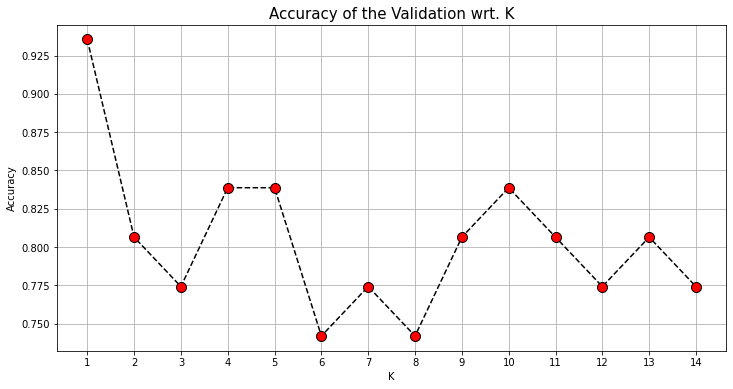

In [431]:

from sklearn.neighbors import KNeighborsClassifier

K_range = np.arange(1, 15)
accuracy_list = []

for k in K_range:
  # create a new model with current K
  knn = KNeighborsClassifier(k, metric="euclidean")
  # fit training data
  knn.fit(X_train, y_train)
  # predict the validation data
  y_pred = knn.predict(X_val)
  # obtain the accuracy value
  accuracy = accuracy_score(y_val, y_pred)
  accuracy_list.append(accuracy)

plt.figure(figsize=(12, 6))  
plt.plot(K_range, accuracy_list, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title('Accuracy of the Validation wrt. K', fontsize=15)  
plt.xlabel('K')  
plt.ylabel('Accuracy')
plt.xticks(K_range)
plt.grid()
plt.show()

In [432]:
# hyper parameter tuning with grid search
params= {'n_neighbors': np.arange(1, 10)} 
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)
# train the model
knn_clf.fit(X_train,y_train)
knn_clf.best_params_ 

{'n_neighbors': 7}

In [433]:
knn_predict = knn_clf.predict(X_test)

We found that k = 7 is the most appropriate value of k.

In [434]:
knn_accuracy = accuracy_score(y_test, knn_predict)
print("Using k-nearest neighbours we get an accuracy of" , knn_accuracy)

Using k-nearest neighbours we get an accuracy of 0.7213114754098361


##Decision Tree

Another model we want to use is Decision tree. Decision tree is useful for decisions such as yes or no (AHD: 0 or 1) while dealing with categorical features. Since we have lots of categorical data, it may give good results.

First we need to convert Chespain and Thal values into their initial values which are categorical. 


In [435]:
df['ChestPain'].replace([1,2,3,4],['typical','nontypical','nonanginal','asymptomatic'],inplace=True)
df['Thal'].replace([1,2,3],['normal','reversable','fixed'],inplace=True)

In [436]:
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.000000,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.000000,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.000000,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.000000,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.000000,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.000000,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.000000,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.000000,reversable,Yes
302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.000000,normal,Yes


In [437]:
from sklearn import tree
model_dt = tree.DecisionTreeClassifier(random_state=0) #Create decision tree classifier object
model_dt.fit(X_train, y_train) #train the classifier using the training data

DecisionTreeClassifier(random_state=0)

**Initial testing**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



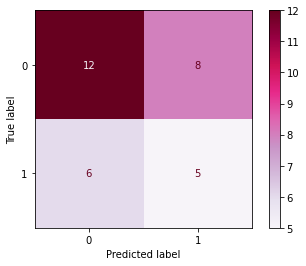

In [438]:
plot_confusion_matrix(model_dt, X_val, y_val, cmap=plt.cm.PuRd)  
plt.grid(False)
plt.show()



```
# Comparing Random forest with the features

In [439]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import auc, precision_recall_curve
from sklearn import metrics 

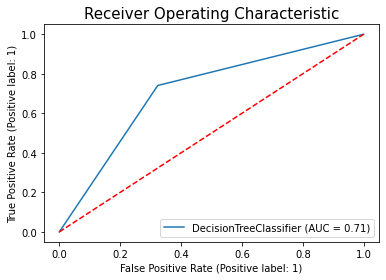

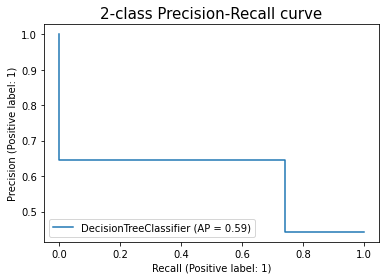

In [440]:
#Receiver Operating Characteristic
RocCurveDisplay.from_estimator(model_dt, X_test, y_test)
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.title("Receiver Operating Characteristic", fontsize=15)
plt.show()

#2-Class Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(model_dt, X_test, y_test)
plt.title("2-class Precision-Recall curve", fontsize=15)
plt.show()

The above graphs show our model's Receiver Operating Characteristics before hyperparameter tuning.

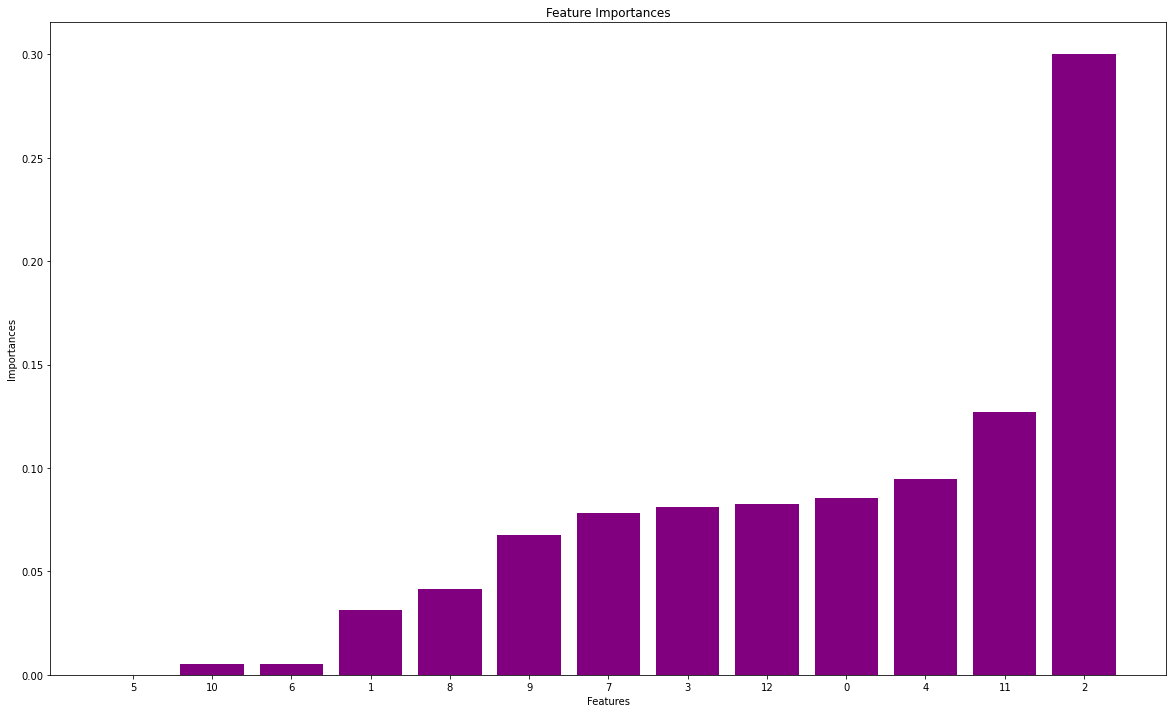

In [441]:
#Create Sorted Importance
feature_list = list(range(X.shape[1]))
importances = list(model_dt.feature_importances_)
feature_importance = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importance, key = lambda x: x[1], reverse = True)

#Create bar chart for importances
fig, ax = plt.subplots(figsize=(20, 12))
index=np.argsort(importances)

plt.xlabel("Features")
plt.ylabel("Importances")
plt.title("Feature Importances")

arr_sorted=[]
for i in index:
  arr_sorted.append(importances[i])

x=np.arange(0,len(importances))
ax.set_xticks(x)
ax.set_xticklabels(index)
ax.bar(x,arr_sorted,color = "purple")
plt.show()

In [442]:
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

model_dt = tree.DecisionTreeClassifier(random_state=42,criterion="gini",class_weight = "balanced") #Create decision tree classifier object
model_dt.fit(X_train, y_train) #train the classifier using the training data

#Decision Tree Testing
dt_predictions_val = model_dt.predict(X_val)
dt_acc_val = accuracy_score(y_val, dt_predictions_val)

print("Decision Tree Validation Accuracy: "+str(dt_acc_val))

from sklearn.tree import plot_tree
from sklearn.tree import export_text

Decision Tree Validation Accuracy: 0.5161290322580645


In [443]:
from sklearn.ensemble import RandomForestClassifier

In [444]:
# candidate max depths
max_depth_values = np.arange(1, 20)
max_depth_train_set_accuracies = []
max_depth_val_set_accuracies = []

# candidate max features
max_features = [3,5,7,10,15,20,25]
feature_train_set_accuracies = []
feature_val_set_accuracies = []

for depth in max_depth_values:
  model = RandomForestClassifier(criterion='entropy', max_depth=depth,random_state=42)
  model.fit(X_train, y_train)
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_val)
  max_depth_train_set_accuracies.append(accuracy_score(y_train, train_preds))
  max_depth_val_set_accuracies.append(accuracy_score(y_val, val_preds))

ind = max_depth_val_set_accuracies.index(np.max(max_depth_val_set_accuracies))
max = max_depth_val_set_accuracies[ind]

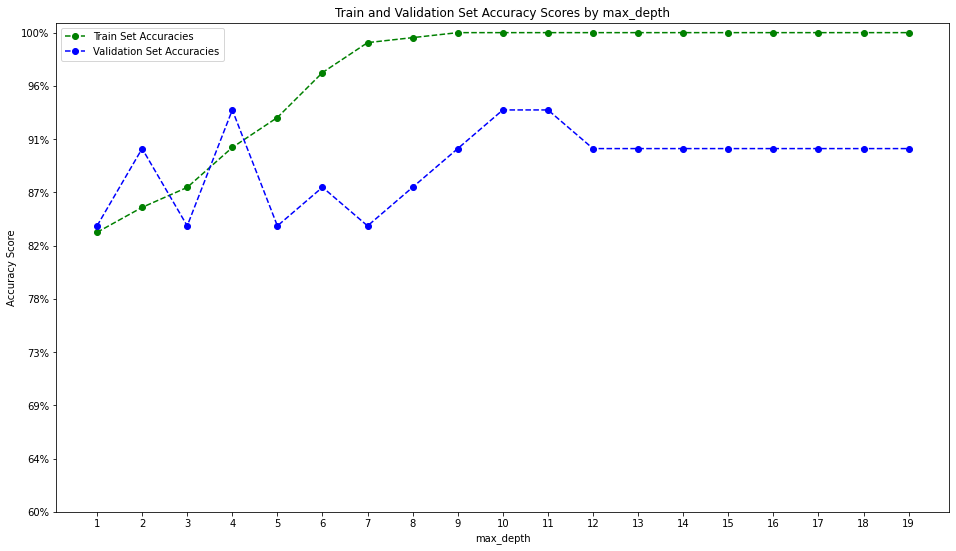

In [445]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9), sharex=False, sharey=False)

# the label/tick locations
x_ticks1 = np.arange(len(max_depth_values))
x_ticks2 = np.arange(len(max_features))
# yloc between 0.6-1
y_ticks = np.linspace(.6, 1.0, 10)
y_labels = [f"{val*100:.0f}%" for val in y_ticks]

ax1.plot(max_depth_train_set_accuracies, "go--", label = "Train Set Accuracies")
ax1.plot(max_depth_val_set_accuracies, "bo--", label = "Validation Set Accuracies")

ax1.set_ylabel("Accuracy Score")
ax1.set_xlabel("max_depth")
ax1.set_title("Train and Validation Set Accuracy Scores by max_depth")
ax1.set_xticks(x_ticks1)
ax1.set_xticklabels(max_depth_values)
ax1.set_yticks(y_ticks)
ax1.set_yticklabels(y_labels)
ax1.legend()
plt.show()

#Accuracy testing

In [446]:
X_val

array([[  9.,   1.,   1.,  21., 131.,   0.,   0.,  54.,   0.,  18.,   0.,
          2.,   1.],
       [ 19.,   1.,   0.,  27.,  34.,   1.,   2.,  47.,   1.,  29.,   2.,
          0.,   2.],
       [ 13.,   1.,   1.,  21.,  82.,   0.,   0.,  70.,   0.,   0.,   0.,
          0.,   1.],
       [ 27.,   1.,   0.,  32.,  34.,   0.,   0.,  53.,   0.,   0.,   0.,
          2.,   2.],
       [ 30.,   1.,   0.,  30.,  43.,   0.,   2.,  25.,   0.,  19.,   1.,
          3.,   0.],
       [  5.,   0.,   1.,  26.,  51.,   0.,   0.,  44.,   0.,   0.,   1.,
          0.,   1.],
       [ 20.,   1.,   0.,  27.,  69.,   0.,   0.,  52.,   0.,  12.,   0.,
          0.,   1.],
       [ 18.,   0.,   1.,  25.,  28.,   0.,   2.,  61.,   0.,   1.,   1.,
          0.,   1.],
       [ 24.,   1.,   1.,   8.,  61.,   0.,   2.,  57.,   0.,  24.,   1.,
          2.,   2.],
       [ 10.,   0.,   1.,   6.,   2.,   0.,   0.,  67.,   0.,   6.,   1.,
          0.,   1.],
       [ 37.,   0.,   2.,  39., 121.,   0.,   0., 

In [447]:
import numpy as np
import pandas as pd

my_array = X_train
df_for_dt = pd.DataFrame(my_array, columns = ['Column_1','Column_2','Column_3','Column_4','Column_5','Column_6','Column_7','Column_8','Column_9','Column_10','Column_11','Column_12','Column_13'])


print(df_for_dt)
print(type(df_for_dt))


     Column_1  Column_2  Column_3  Column_4  Column_5  Column_6  Column_7  \
0        10.0       1.0       3.0       7.0      29.0       0.0       2.0   
1         7.0       1.0       1.0       7.0      66.0       0.0       0.0   
2        20.0       1.0       3.0      13.0      24.0       0.0       0.0   
3        25.0       1.0       3.0      40.0      14.0       1.0       2.0   
4        22.0       1.0       1.0      21.0      52.0       0.0       2.0   
..        ...       ...       ...       ...       ...       ...       ...   
235      30.0       1.0       3.0      19.0      92.0       0.0       0.0   
236      28.0       0.0       3.0      26.0     116.0       1.0       0.0   
237      29.0       1.0       3.0      21.0     139.0       1.0       2.0   
238      16.0       1.0       3.0      33.0      73.0       0.0       2.0   
239      28.0       0.0       3.0      27.0     147.0       0.0       2.0   

     Column_8  Column_9  Column_10  Column_11  Column_12  Column_13  
0    

In [448]:

my_array = X
df_x= pd.DataFrame(my_array, columns = ['Column_1','Column_2','Column_3','Column_4','Column_5','Column_6','Column_7','Column_8','Column_9','Column_10','Column_11','Column_12','Column_13'])

print(df_x)

     Column_1  Column_2  Column_3  Column_4  Column_5  Column_6  Column_7  \
0        29.0       1.0       0.0      30.0      64.0       1.0       2.0   
1        33.0       1.0       3.0      39.0     111.0       0.0       2.0   
2        33.0       1.0       3.0      13.0      60.0       0.0       2.0   
3         3.0       1.0       2.0      21.0      80.0       0.0       0.0   
4         7.0       0.0       1.0      21.0      35.0       0.0       2.0   
..        ...       ...       ...       ...       ...       ...       ...   
296      11.0       1.0       0.0       7.0      93.0       0.0       0.0   
297      34.0       1.0       3.0      29.0      26.0       1.0       0.0   
298      23.0       1.0       3.0      21.0       1.0       0.0       0.0   
299      23.0       0.0       1.0      21.0      67.0       0.0       2.0   
300       4.0       1.0       2.0      26.0      13.0       0.0       0.0   

     Column_8  Column_9  Column_10  Column_11  Column_12  Column_13  
0    

In [449]:
my_array1 = X_val
df_for_dt_2 = pd.DataFrame(my_array, columns = ['Column_1','Column_2','Column_3','Column_4','Column_5','Column_6','Column_7','Column_8','Column_9','Column_10','Column_11','Column_12','Column_13'])


print(df_for_dt_2)
print(type(df_for_dt_2))

     Column_1  Column_2  Column_3  Column_4  Column_5  Column_6  Column_7  \
0        29.0       1.0       0.0      30.0      64.0       1.0       2.0   
1        33.0       1.0       3.0      39.0     111.0       0.0       2.0   
2        33.0       1.0       3.0      13.0      60.0       0.0       2.0   
3         3.0       1.0       2.0      21.0      80.0       0.0       0.0   
4         7.0       0.0       1.0      21.0      35.0       0.0       2.0   
..        ...       ...       ...       ...       ...       ...       ...   
296      11.0       1.0       0.0       7.0      93.0       0.0       0.0   
297      34.0       1.0       3.0      29.0      26.0       1.0       0.0   
298      23.0       1.0       3.0      21.0       1.0       0.0       0.0   
299      23.0       0.0       1.0      21.0      67.0       0.0       2.0   
300       4.0       1.0       2.0      26.0      13.0       0.0       0.0   

     Column_8  Column_9  Column_10  Column_11  Column_12  Column_13  
0    

In [450]:
dt_predictions = model_dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_predictions)
print("Decision Tree Test Accuracy with Default Parameters: "+str(dt_acc))

model_dt_new = tree.DecisionTreeClassifier(max_depth=4)
model_dt_new.fit(X_train, y_train)

#printing the precision 
dt_predictions = model_dt_new.predict(X_test)
dt_acc = accuracy_score(y_test, dt_predictions)
print("Decision Tree Test Accuracy with Tuned Parameters:   "+str(dt_acc))

Decision Tree Test Accuracy with Default Parameters: 0.7213114754098361
Decision Tree Test Accuracy with Tuned Parameters:   0.7213114754098361


Here, we are able to observe that after hyperparameter tuning, both the AUC and AP values have increased.

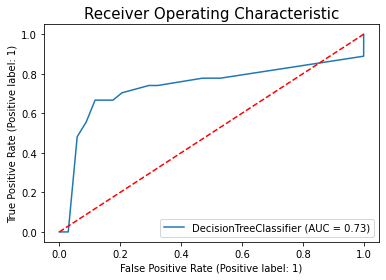

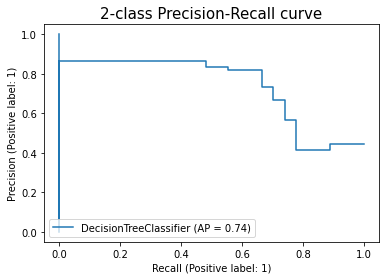

In [451]:
#Receiver Operating Characteristic
RocCurveDisplay.from_estimator(model_dt_new, X_test, y_test)
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.title("Receiver Operating Characteristic", fontsize=15)
plt.show()

#2-Class Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(model_dt_new, X_test, y_test)
plt.title("2-class Precision-Recall curve", fontsize=15)
plt.show()

Below is our decision tree plot. The tree shows that how it compares the most significant features to decide whether the participant would have AHD or not. The color gradient on the plot shows the density of participant that is considered in the corresponding nodes & leaves.

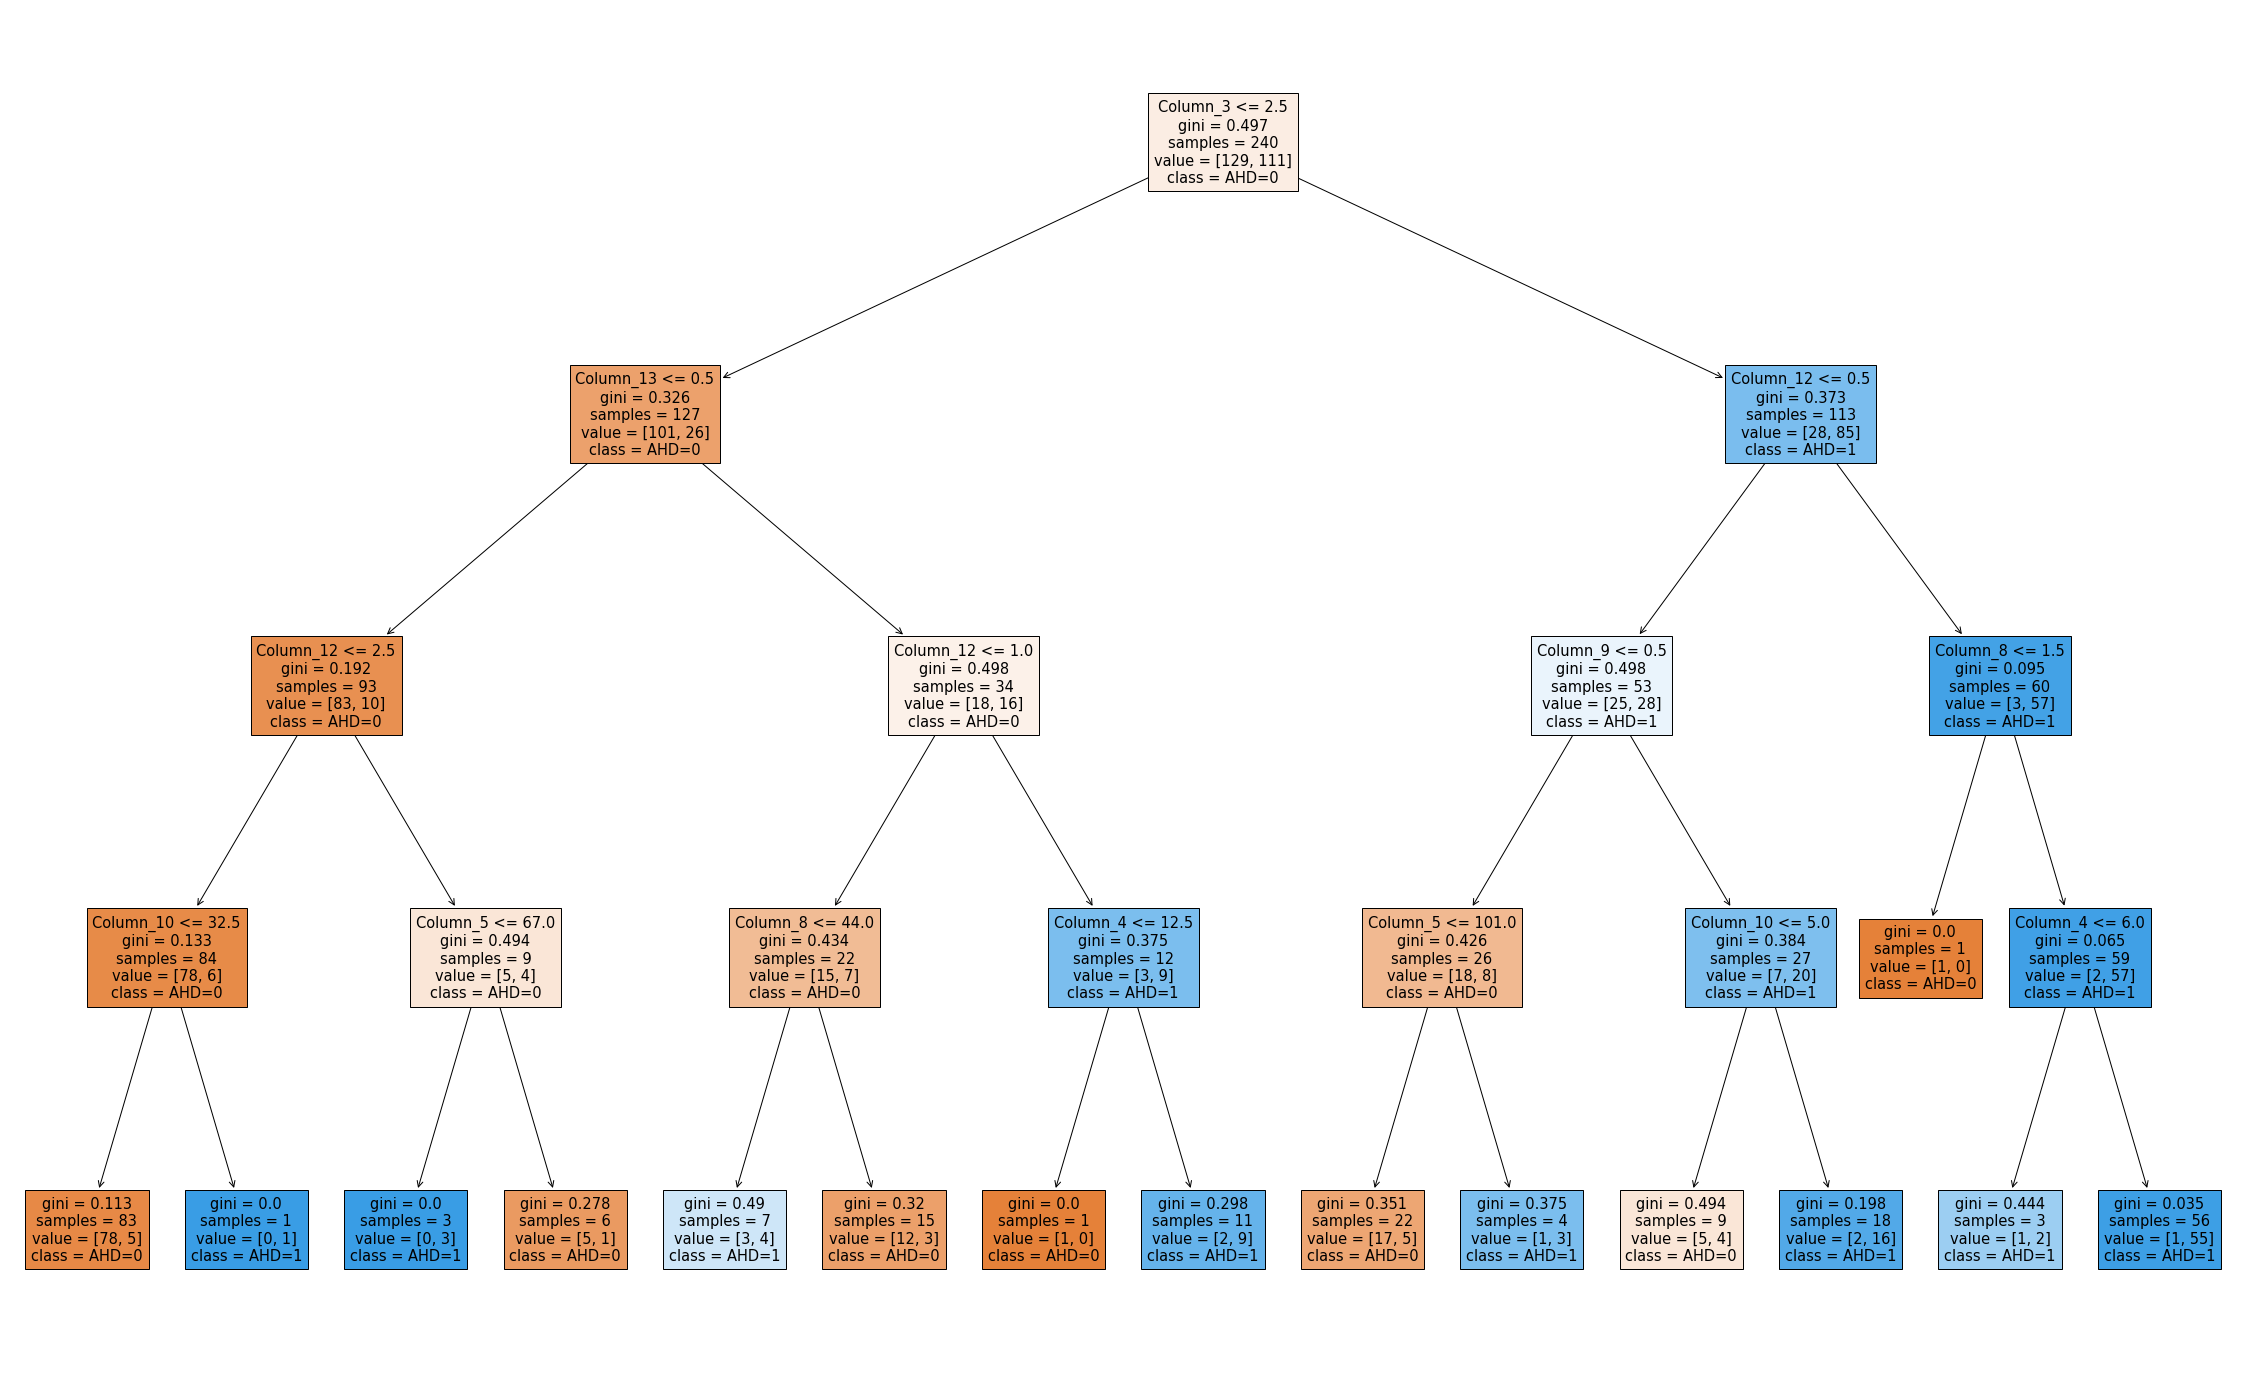

In [452]:
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import export_text
fig = plt.figure(figsize=(40, 25))
plot_tree(model_dt_new, feature_names=df_x.columns.values, class_names=['AHD=0', 'AHD=1'], filled=True);

In [453]:
decision_tree_accuracy = accuracy_score(y_test, dt_predictions)
print("Using decision tree we get an accuracy of" ,decision_tree_accuracy)

Using decision tree we get an accuracy of 0.7213114754098361


##Support Vector Machine

We also tried this model since it works well with either categorical and numerical data.

Since we also tried with numerical values of ChestPain and Thal and saw that SVM works better with numerical values, we decided to convert categorical values of ChesPain and Thal into numerical values.

In [454]:
df['ChestPain'].replace(['typical','nontypical','nonanginal','asymptomatic'],[1,2,3,4],inplace=True)
df['Thal'].replace(['normal','reversable','fixed'],[1,2,3],inplace=True)
df['Thal'].replace(['normal','reversable','fixed'],[1,2,3],inplace=True)
df['AHD'].replace(['No','Yes'],[0,1],inplace=True)

In [455]:
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,3,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,1,1
3,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,2,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,1,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,2,1
300,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,2,1
301,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,2,1
302,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,1,1


In [456]:
from sklearn.svm import SVC

In [457]:
#grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [458]:
# train the model
svm_clf.fit(X_train, y_train)
svm_clf.best_params_ 

{'C': 10, 'gamma': 0.001}

In [459]:
# predictions
svm_predict = svm_clf.predict(X_test)

In [460]:
#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print("Using SVM we get an accuracy of", svm_accuracy)

Using SVM we get an accuracy of 0.7377049180327869


#Conclusion

We found that logistic regression is the best machine learning model among we used for our project based on their accuracy levels. 


In [461]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':logistic_regression_accuracy},
    "K-nearest neighbours":{'Accuracy':knn_accuracy},
    "Decision trees":{'Accuracy':decision_tree_accuracy},
    "Support vector machine":{'Accuracy':svm_accuracy}
}).T
comparison

,Accuracy
Logistic regression,0.885246
K-nearest neighbours,0.721311
Decision trees,0.721311
Support vector machine,0.737705


##Building a system that can predict whether a person could suffer from heart disease when provided with values of those attributes.

In [462]:
df.to_numpy()[:1,:13] # the first row of our dataframe

array([[ 63. ,   1. ,   1. , 145. , 233. ,   1. ,   2. , 150. ,   0. ,
          2.3,   3. ,   0. ,   3. ]])

In [463]:
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,3,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,1,1
3,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,2,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,1,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,2,1
300,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,2,1
301,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,2,1
302,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,1,1


In [464]:
prediction = model_Log.predict(df.to_numpy()[:1,:13])
if prediction[0] == 0:
  print("You are not at risk")

else:
   print("You are at risk.")

# our model predicted wrong.

You are at risk.


In [465]:
#second row of our dataframe
prediction = model_Log.predict(df.to_numpy()[1:2,:13])
if prediction[0] == 0:
  print("You are not at risk")

else:
   print("You are at risk.")

# our model predicted correctly.

You are at risk.


In [466]:
input_list = []
age_inp = input("Enter your Age value : ")
input_list.append(age_inp)
sex_inp = input("Enter your Sex value: ")
input_list.append(sex_inp)
chestPain_inp = input("Enter your ChestPain value: ")
input_list.append(chestPain_inp)
restBP_inp = input("Enter your RestBP value: ")
input_list.append(restBP_inp)
chol_inp = input("Enter your Chol value: ")
input_list.append(chol_inp)
fbs_inp = input("Enter your Fbs value: ")
input_list.append(fbs_inp)
restECG_inp = input("Enter your RestECG value: ")
input_list.append(restECG_inp)
maxHR_inp = input("Enter your MaxHR value: ")
input_list.append(maxHR_inp)
exAng_inp = input("Enter your ExAng value: ")
input_list.append(exAng_inp)
oldpeak_inp = input("Enter your Oldpeak value: ")
input_list.append(oldpeak_inp)
slope_inp = input("Enter your Slope value: ")
input_list.append(slope_inp)
ca_inp = input("Enter your Ca value: ")
input_list.append(ca_inp)
thal_inp = input("Enter your Thal value: ")
input_list.append(thal_inp)

Enter your Age value : 67
Enter your Sex value: 1
Enter your ChestPain value: 4
Enter your RestBP value: 120
Enter your Chol value: 229
Enter your Fbs value: 0
Enter your RestECG value: 2
Enter your MaxHR value: 129
Enter your ExAng value: 1
Enter your Oldpeak value: 2.6
Enter your Slope value: 2
Enter your Ca value: 2.000000
Enter your Thal value: 2


In [469]:
df_input = pd.DataFrame([input_list], columns=['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak' ,'Slope', 'Ca', 'Thal'])

In [471]:
prediction = model_Log.predict(df_input)
if prediction[0] == 0:
  print("You are not at risk")

else:
   print("You are at risk.")

# above, we tested for the third row. it gave correct result :)

You are at risk.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



Final say
---------------
Our program runs successfully with the full information given by the user.
However, we should do imputation for partial input. It can be done in several ways.Imputing missing values with mean, Iterative imputation of the missing values or kNN-imputation of the missing values could be conducted. 